# Belize

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import folium 

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Bring in qualitative dataset
belize_qual_df = pd.read_csv('Household_solid_waste_audit_Belize_metadata.csv')
print('Shape of Dataset:', belize_qual_df.shape)
belize_qual_df

Shape of Dataset: (282, 95)


,ID,Date,Premisestype,Location,Urbanity,Locationlat,Locationlong,Currency,Binsnumber,Binssizematerial,Collected,Collectionavailable,Collectioninfo,Collectioninfochannel,Collectioninfochannelinterp,Collectionperiod,Accumulationtimenum,Collectionperiodother,Collectionrating,Collectionratingreason,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionrubbishbagwilling,Bownbowcollectionopinion,Collectionsuggestions,Collectionwillingtopay,Wastedisposalbulky,Wastedisposalbulkyother,Wastedisposalgeneral,Wastedisposalgeneralother,Wastedisposalgreen,Wastedisposalgreenother,Wastedisposalnappies,Wastedisposalnappiesother,Dietfood_0,Dietfrequency_0,Dietsource_0,Dietfood_1,Dietfrequency_1,Dietsource_1,Dietfood_2,Dietfrequency_2,Dietsource_2,Groceryexpenses,Groceryperiod,Groceryperiodnum,Groceryperiodother,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Whatsourcesofincomedoesthispersonhave_0,Incomeamount_0,Incomeperiod_0,Incomeperiodnum_0,Incomeperiodother_0,Whatsourcesofincomedoesthispersonhave_1,Incomeamount_1,Incomeperiod_1,Incomeperiodnum_1,Incomeperiodother_1,Whatsourcesofincomedoesthispersonhave_2,Incomeamount_2,Incomeperiod_2,Incomeperiodnum_2,Incomeperiodother_2,Whatsourcesofincomedoesthispersonhave_3,Incomeamount_3,Incomeperiod_3,Incomeperiodnum_3,Whatsourcesofincomedoesthispersonhave_4,Incomeamount_4,Incomeperiod_4,Incomeperiodnum_4,Whatsourcesofincomedoesthispersonhave_5,Incomeamount_5,Incomeperiod_5,Incomeperiodnum_5,Incometotal,Levysupport,Electricityexpensesperiod,Mobilephone,Softdrinkcans,Transportationexpensesperiod,Waterbottlespweek,Totalcontainers,Cigarettebutts,Cigarettepackets,Straws,Coffeecups,Bagsglossy,Bagssupermarket,Takeawayconts,Takeawaylids
0,37,03/06/2019,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0
1,39,03/06/2019,pt_household,Belmopan,Urban,17.244606,-88.768488,bzd,1.0,40L,NaN,yes,yes,Council,council,p_3days,3.5,NaN,2.0,Not consistent schedule because of using tractor,half_full,yes,1.00,yes,More trucks,2.0,disp_collect,NaN,disp_collect,NaN,disp_collect,NaN,other,None,Rice,df_some_days,diet_buy,Fruits,df_every_day,diet_buy,Beans,df_some_days,diet_buy,0.0,p_week,7.0,NaN,0.000000,2.0,0.0,1.0,own,Teacher,0.0,p_month,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,yes,90,yes,0.0,100,3 5 gallons,0.0,0.0,0.0,0.0,0.0,0.0,19.0,8.0,0.0
2,31,03/06/2019,pt_household,Belmopan,Urban,17.251912,-88.767950,bzd,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,teacher,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,4.0
3,32,03/06/2019,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,1.0
4,33,03/06/2019,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,6.0
5,34,03/06/2019,pt_household,B

In [3]:
#Bring in EDA dataset from modeling notebook
belize_eda_model = pd.read_csv('Belize - EDA_DataFrame.csv', index_col='Unnamed: 0')
print('Shape of Dataset:', belize_eda_model.shape)
belize_eda_model.head()

Shape of Dataset: (222, 39)


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Date,Premisestype,Location,Type,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,1,0.235955,0.359551,0.404494,0.000000,0.534,1.30,0.69,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.010,0.026,0.030,0.017,0.066,0.067,0.126,0.192,0.0000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2,0.738022,0.016245,0.183632,0.062102,4.863,2.76,13.42,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.003,0.058,0.147,0.075,0.196,0.188,0.000,0.000,0.0115,0.063,0.203,0.070,0.013,0.26,0.537,2.989,0.009,0.029,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,3,0.894826,0.016571,0.068312,0.020291,2.957,3.03,8.96,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.035,0.075,0.000,0.000,0.012,0.023,0.000,0.000,0.0000,0.000,0.057,0.031,0.000,0.00,0.000,1.927,0.000,0.013,0.047,0.719,0.018,0.0,0.0,0.0,0.0,0.0
3,4,0.407692,0.094872,0.258974,0.238462,0.390,1.72,0.67,2020-08-06,pt_household,Bullet Tree Falls,Rural,0.0,0.003,0.065,0.000,0.000,0.028,0.000,0.000,0.037,0.0050,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.093,0.159,0.000,0.0,0.0,0.0,0.0,0.0
4,5,0.896653,0.027299,0.076048,0.000000,3.077,3.09,9.51,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.000,0.068,0.000,0.024,0.106,0.000,0.071,0.047,0.0180,0.000,0.000,0.000,0.000,0.00,0.000,2.366,0.037,0.000,0.000,0.322,0.000,0.0,0.0,0.0,0.0,0.0


In [4]:
#Combine the two datasets
belize_eda_model = pd.merge(belize_qual_df,
                     belize_eda_model.drop(['Date',
                                    'Premisestype',
                                    'Location'],
                                     axis=1),
                     how='outer',
                     on='ID')
print(belize_eda_model.shape)
belize_eda_model.head()

(282, 130)


,ID,Date,Premisestype,Location,Urbanity,Locationlat,Locationlong,Currency,Binsnumber,Binssizematerial,Collected,Collectionavailable,Collectioninfo,Collectioninfochannel,Collectioninfochannelinterp,Collectionperiod,Accumulationtimenum,Collectionperiodother,Collectionrating,Collectionratingreason,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionrubbishbagwilling,Bownbowcollectionopinion,Collectionsuggestions,Collectionwillingtopay,Wastedisposalbulky,Wastedisposalbulkyother,Wastedisposalgeneral,Wastedisposalgeneralother,Wastedisposalgreen,Wastedisposalgreenother,Wastedisposalnappies,Wastedisposalnappiesother,Dietfood_0,Dietfrequency_0,Dietsource_0,Dietfood_1,Dietfrequency_1,Dietsource_1,Dietfood_2,Dietfrequency_2,Dietsource_2,Groceryexpenses,Groceryperiod,Groceryperiodnum,Groceryperiodother,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Whatsourcesofincomedoesthispersonhave_0,Incomeamount_0,Incomeperiod_0,Incomeperiodnum_0,Incomeperiodother_0,Whatsourcesofincomedoesthispersonhave_1,Incomeamount_1,Incomeperiod_1,Incomeperiodnum_1,Incomeperiodother_1,Whatsourcesofincomedoesthispersonhave_2,Incomeamount_2,Incomeperiod_2,Incomeperiodnum_2,Incomeperiodother_2,Whatsourcesofincomedoesthispersonhave_3,Incomeamount_3,Incomeperiod_3,Incomeperiodnum_3,Whatsourcesofincomedoesthispersonhave_4,Incomeamount_4,Incomeperiod_4,Incomeperiodnum_4,Whatsourcesofincomedoesthispersonhave_5,Incomeamount_5,Incomeperiod_5,Incomeperiodnum_5,Incometotal,Levysupport,Electricityexpensesperiod,Mobilephone,Softdrinkcans,Transportationexpensesperiod,Waterbottlespweek,Totalcontainers,Cigarettebutts,Cigarettepackets,Straws,Coffeecups,Bagsglossy,Bagssupermarket,Takeawayconts,Takeawaylids,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Type,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,37,03/06/2019,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.237988,0.069151,0.335878,0.356982,2.227,1.04,2.32,Urban,0.0,0.175,0.231,0.113,0.000,0.204,0.000,0.000,0.000,0.0,0.000,0.025,0.154,0.032,0.000,0.05,0.480,0.000,0.390,0.373,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,39,03/06/2019,pt_household,Belmopan,Urban,17.244606,-88.768488,bzd,1.0,40L,NaN,yes,yes,Council,council,p_3days,3.5,NaN,2.0,Not consistent schedule because of using tractor,half_full,yes,1.0,yes,More trucks,2.0,disp_collect,NaN,disp_collect,NaN,disp_collect,NaN,other,None,Rice,df_some_days,diet_buy,Fruits,df_every_day,diet_buy,Beans,df_some_days,diet_buy,0.0,p_week,7.0,NaN,0.0,2.0,0.0,1.0,own,Teacher,0.0,p_month,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,yes,90,yes,0.0,100,3 5 gallons,0.0,0.0,0.0,0.0,0.0,0.0,19.0,8.0,0.0,0.760519,0.050493,0.171676,0.017312,8.318,2.90,24.12,Urban,3.5,0.200,0.206,0.229,0.192,0.079,0.000,0.000,0.158,0.0,2.157,0.522,0.212,0.000,0.000,0.00,4.169,0.050,0.053,0.091,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,31,03/06/2019,pt_household,Belmopan,Urban,17.251912,-88.767950,bzd,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,teacher,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5.0,0.0,

## Clean Data

In [5]:
#Inspect feature value counts
for column in belize_eda_model.columns:
    print(f'{column} Value Counts:')
    print(belize_eda_model[column].value_counts(normalize=True, dropna=False).head(10))
    print('Total Unique Values:', belize_eda_model[column].nunique())
    print('----------------------------')

ID Value Counts:
1670    0.007092
510     0.003546
95      0.003546
90      0.003546
91      0.003546
92      0.003546
93      0.003546
94      0.003546
96      0.003546
88      0.003546
Name: ID, dtype: float64
Total Unique Values: 281
----------------------------
Date Value Counts:
NaN           0.212766
05/06/2019    0.109929
03/06/2019    0.106383
14/06/2019    0.102837
04/06/2019    0.102837
10/06/2019    0.099291
06/06/2019    0.078014
08/06/2019    0.070922
07/06/2019    0.042553
31/05/2019    0.035461
Name: Date, dtype: float64
Total Unique Values: 11
----------------------------
Premisestype Value Counts:
pt_household    0.953901
pt_litter       0.042553
0               0.003546
Name: Premisestype, dtype: float64
Total Unique Values: 3
----------------------------
Location Value Counts:
Belize City          0.301418
Dangriga             0.170213
Belmopan             0.166667
Orange Walk          0.106383
Toledo Rural         0.106383
Bullet Tree Falls    0.070922
Corozal Town 

Name: Wastedisposalbulkyother, dtype: float64
Total Unique Values: 62
----------------------------
Wastedisposalgeneral Value Counts:
disp_collect    0.539007
NaN             0.280142
disp_burn       0.134752
other           0.039007
disp_bury       0.007092
Name: Wastedisposalgeneral, dtype: float64
Total Unique Values: 4
----------------------------
Wastedisposalgeneralother Value Counts:
NaN                                                                                      0.960993
Garbage is bagged and tied for when the garbage truck comes once a month.                0.003546
Some is burnt and some are bagged until the truck comes.                                 0.003546
Cans and bottles are transported to dump site for their own homes                        0.003546
Feed to pigs                                                                             0.003546
They use the collection service in the community but also burn papers.                   0.003546
Bags              

Incomeamount_0 Value Counts:
NaN        0.492908
 0.0       0.195035
 2000.0    0.049645
 1500.0    0.035461
 250.0     0.024823
 150.0     0.017730
 3000.0    0.017730
 200.0     0.014184
 1000.0    0.014184
 2500.0    0.010638
Name: Incomeamount_0, dtype: float64
Total Unique Values: 35
----------------------------
Incomeperiod_0 Value Counts:
NaN            0.500000
p_month        0.230496
p_fortnight    0.109929
p_week         0.099291
other          0.039007
p_1day         0.017730
p_year         0.003546
Name: Incomeperiod_0, dtype: float64
Total Unique Values: 6
----------------------------
Incomeperiodnum_0 Value Counts:
NaN       0.539007
 30.0     0.230496
 14.0     0.109929
 7.0      0.099291
 1.0      0.017730
 365.0    0.003546
Name: Incomeperiodnum_0, dtype: float64
Total Unique Values: 5
----------------------------
Incomeperiodother_0 Value Counts:
NaN                                                                        0.968085
Everytime a repair happens...          

NaN     0.212766
 1.0    0.145390
 0.0    0.145390
 2.0    0.081560
 3.0    0.074468
 5.0    0.056738
 4.0    0.046099
 6.0    0.042553
 7.0    0.035461
 8.0    0.031915
Name: Totalcontainers, dtype: float64
Total Unique Values: 25
----------------------------
Cigarettebutts Value Counts:
 0.0     0.773050
NaN      0.212766
 18.0    0.003546
 1.0     0.003546
 2.0     0.003546
 5.0     0.003546
Name: Cigarettebutts, dtype: float64
Total Unique Values: 5
----------------------------
Cigarettepackets Value Counts:
 0.0    0.748227
NaN     0.212766
 1.0    0.017730
 4.0    0.007092
 3.0    0.007092
 2.0    0.007092
Name: Cigarettepackets, dtype: float64
Total Unique Values: 5
----------------------------
Straws Value Counts:
 0.0     0.617021
NaN      0.212766
 1.0     0.078014
 2.0     0.035461
 3.0     0.021277
 5.0     0.014184
 4.0     0.007092
 15.0    0.003546
 10.0    0.003546
 12.0    0.003546
Name: Straws, dtype: float64
Total Unique Values: 10
----------------------------
Coffee

Total Unique Values: 92
----------------------------
paper Value Counts:
 0.000    0.273050
NaN       0.212766
 0.040    0.014184
 0.142    0.010638
 0.287    0.007092
 0.109    0.007092
 0.085    0.007092
 0.067    0.007092
 0.249    0.007092
 0.144    0.007092
Name: paper, dtype: float64
Total Unique Values: 118
----------------------------
aluminium_cans Value Counts:
 0.000    0.652482
NaN       0.212766
 0.014    0.017730
 0.018    0.007092
 0.030    0.007092
 0.032    0.007092
 0.025    0.007092
 0.015    0.007092
 0.040    0.007092
 0.013    0.007092
Name: aluminium_cans, dtype: float64
Total Unique Values: 28
----------------------------
jars Value Counts:
 0.000    0.578014
NaN       0.212766
 0.120    0.007092
 0.134    0.007092
 0.306    0.003546
 0.985    0.003546
 0.612    0.003546
 0.113    0.003546
 0.149    0.003546
 0.256    0.003546
Name: jars, dtype: float64
Total Unique Values: 58
----------------------------
other_organics Value Counts:
 0.000    0.617021
NaN      

### Drop Unnecessary Features

In [6]:
drop_columns = ['Date',
                'Type',
                'Binssizematerial',
                'Collected',
                'Currency',
                'Collectioninfochannel',
                'Collectioninfochannelinterp',
                'Accumulationtimenum',
                'Collectionperiodother',
                'Collectionratingreason',
                'Collectionrubbishbagwilling',
                'Bownbowcollectionopinion',
                'Collectionsuggestions',
                'Wastedisposalbulky',
                'Wastedisposalbulkyother',
                'Wastedisposalgeneralother',
                'Wastedisposalgreenother',
                'Wastedisposalnappiesother',
                'Dietfood_0',
                'Dietfrequency_0',
                'Dietsource_0',
                'Dietfood_1',
                'Dietfrequency_1',
                'Dietsource_1',
                'Dietfood_2',
                'Dietfrequency_2',
                'Dietsource_2',
                'Groceryperiod',
                'Groceryperiodother',
                'Whatsourcesofincomedoesthispersonhave_0',
                'Incomeamount_0',
                'Incomeperiod_0',
                'Incomeperiodnum_0',
                'Incomeperiodother_0',
                'Whatsourcesofincomedoesthispersonhave_1',
                'Incomeamount_1',
                'Incomeperiod_1',
                'Incomeperiodnum_1',
                'Incomeperiodother_1',
                'Whatsourcesofincomedoesthispersonhave_2',
                'Incomeamount_2',
                'Incomeperiod_2',
                'Incomeperiodnum_2',
                'Incomeperiodother_2',
                'Whatsourcesofincomedoesthispersonhave_3',
                'Incomeamount_3',
                'Incomeperiod_3',
                'Incomeperiodnum_3',
                'Whatsourcesofincomedoesthispersonhave_4',
                'Incomeamount_4',
                'Incomeperiod_4',
                'Incomeperiodnum_4',
                'Whatsourcesofincomedoesthispersonhave_5',
                'Incomeamount_5',
                'Incomeperiod_5',
                'Incomeperiodnum_5',
                'Electricityexpensesperiod',
                'Mobilephone',
                'Softdrinkcans',
                'Transportationexpensesperiod',
                'Waterbottlespweek',
                'Totalcontainers',
                'Cigarettebutts',
                'Cigarettepackets',
                'Straws',
                'Coffeecups',
                'Bagsglossy',
                'Bagssupermarket',
                'Takeawayconts',
                'Takeawaylids']
belize_eda_model = belize_eda_model.drop(drop_columns, axis=1)
print(belize_eda_model.shape)
belize_eda_model.head()

(282, 60)


,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,37,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237988,0.069151,0.335878,0.356982,2.227,1.04,2.32,0.0,0.175,0.231,0.113,0.000,0.204,0.000,0.000,0.000,0.0,0.000,0.025,0.154,0.032,0.000,0.05,0.480,0.000,0.390,0.373,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,39,pt_household,Belmopan,Urban,17.244606,-88.768488,1.0,yes,yes,p_3days,2.0,half_full,yes,2.0,disp_collect,disp_collect,other,0.0,7.0,0.0,2.0,0.0,1.0,own,0.0,yes,0.760519,0.050493,0.171676,0.017312,8.318,2.90,24.12,3.5,0.200,0.206,0.229,0.192,0.079,0.000,0.000,0.158,0.0,2.157,0.522,0.212,0.000,0.000,0.00,4.169,0.050,0.053,0.091,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,31,pt_household,Belmopan,Urban,17.251912,-88.767950,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.808081,0.033058,0.141108,0.017753,3.267,2.96,9.67,0.0,0.035,0.000,0.128,0.016,0.044,0.050,0.306,0.046,0.0,0.031,0.188,0.000,0.000,0.000,0.00,2.303,0.062,0.000,0.058,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,32,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521251,0.035285,0.064956,0.378508,4.988,1.79,8.93,0.0,0.010,0.060,0.000,0.087,0.016,0.012,0.084,0.176,0.0,0.000,0.139,0.000,0.000,0.985,0.00,2.516,0.000,0.000,0.232,0.0,0.0,0.0,0.0,0.671,0.0,0.0
4,33,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488510,0.197110,0.296375,0.018005,4.221,2.28,9.62,0.0,0.061,0.213,0.000,0.970,0.007,0.000,0.096,0.322,0.0,0.000,0.000,0.000,0.000,0.000,0.00,1.966,0.510,0.000,0.076,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [7]:
beize_households = belize_eda_model[belize_eda_model['Premisestype'] == 'pt_household']
beize_litter = belize_eda_model[belize_eda_model['Premisestype'] == 'pt_litter']

In [8]:
beize_litter.describe()

,ID,Locationlat,Locationlong,Binsnumber,Collectionrating,Collectionwillingtopay,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Incometotal,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
count,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,1006.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492642,0.041330,0.339288,0.126740,3.780750,1.876667,7.434167,0.0,0.090250,0.195083,0.637083,0.014833,0.078167,0.035667,0.111167,0.040083,0.142458,0.186583,0.01450,0.063000,0.011750,0.129083,1.170000,0.474583,0.001583,0.006583,0.070583,0.0,0.060167,0.018083,0.073500,0.068583,0.037833,0.0
std,3.605551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340613,0.042891,0.307099,0.191337,2.293958,1.110899,5.832965,0.0,0.116027,0.257014,0.821129,0.028517,0.101192,0.057435,0.317845,0.129398,0.181374,0.491287,0.02492,0.115921,0.021755,0.286053,1.728895,0.809092,0.005485,0.010352,0.129096,0.0,0.120283,0.062643,0.189095,0.107053,0.131059,0.0
min,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.025729,0.000000,1.227000,0.000000,0.000000,0.0,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1003.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200740,0.007431,0.093527,0.003863,2.333000,1.085000,3.452500,0.0,0.017250,0.060750,0.056750,0.000000,0.017000,0.000000,0.000000,0.000000,0.005750,0.000000,0.00000,0.000000,0.000000,0.000000,0.067500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1006.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469186,0.013476,0.219814,0.037787,3.100000,2.065000,5.730000,0.0,0.042500,0.079000,0.369000,0.003000,0.039000,0.009000,0.000000,0.000000,0.052250,0.000000,0.00000,0.009000,0.000000,0.000000,0.238000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1009.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765307,0.090889,0.563883,0.177380,4.545750,2.765000,12.240000,0.0,0.130750,0.228500,0.719500,0.016500,0.079500,0.049500,0.000000,0.000000,0.284750,0.008250,0.02100,0.052750,0.015000,0.131500,1.435750,0.725500,0.000000,0.010000,0.079250,0.0,0.033000,0.000000,0.000000,0.142250,0.000000,0.0
max,1012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972173,0.099969,0.973105,0.658414,9.305000,3.120000,18.020000,0.0,0.413000,0.960000,2.671000,0.101000,0.320000,0.190000,1.097000,0.450000,0.509000,1.668000,0.07000,0.386000,0.076000,1.014000,4.402000,2.339000,0.019000,0.033000,0.393000,0.0,0.345000,0.217000,0.627000,0.269000,0.454000,0.0


In [9]:
beize_households.describe()

,ID,Locationlat,Locationlong,Binsnumber,Collectionrating,Collectionwillingtopay,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Incometotal,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
count,269.00000,195.000000,195.000000,202.00000,204.000000,197.000000,193.000000,194.000000,186.000000,204.000000,197.000000,203.000000,117.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,384.32342,17.305312,-88.575468,1.10396,4.063725,6.482234,193.937824,14.154639,513.118280,10.602941,1.482234,1.458128,2518.505729,0.536261,0.123113,0.220875,0.119751,4.226617,2.065598,10.086029,4.784689,0.049383,0.139450,0.164732,0.024938,0.122675,0.082038,0.120895,0.104096,0.008684,0.414785,0.064297,0.137837,0.006584,0.082703,0.242325,1.701474,0.038239,0.034852,0.096713,0.229656,0.124794,0.053536,0.079679,0.077746,0.014077,0.009096
std,1075.45788,0.600255,0.330339,0.76235,1.707952,15.489165,166.508372,9.915017,425.273090,113.241597,1.472863,1.005909,6231.138249,0.280597,0.150766,0.179908,0.144468,3.189945,0.944285,9.512790,8.431087,0.068437,0.140358,0.203822,0.082842,0.146203,0.357407,0.267721,0.244306,0.026893,1.559829,0.100411,0.230103,0.024983,0.187406,1.159602,1.903563,0.157496,0.066572,0.187179,0.526331,0.408309,0.237481,0.342957,0.324862,0.112954,0.058334
min,1.00000,16.096324,-89.201720,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.00000,16.967476,-88.793509,1.00000,3.000000,0.000000,75.000000,7.000000,214.285714,2.000000,0.000000,1.000000,0.000000,0.330649,0.023657,0.095789,0.018805,1.972000,1.510000,2.840000,0.000000,0.000000,0.049000,0.028000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.00000,17.251912,-88.568538,1.00000,4.000000,2.000000,160.000000,14.000000,428.571429,2.000000,1.000000,1.000000,1200.000000,0.580770,0.068464,0.173504,0.071817,3.456000,2.370000,7.640000,2.000000,0.025000,0.093000,0.112000,0.000000,0.079000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,1.013000,0.000000,0.008000,0.047000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,232.00000,17.509946,-88.220895,1.00000,5.000000,5.000000,300.000000,26.000000,675.000000,3.000000,2.000000,2.000000,2571.428571,0.748304,0.161871,0.296375,0.169251,5.948000,2.810000,14.330000,7.000000,0.071000,0.202000,0.232000,0.019000,0.165000,0.070000,0.117000,0.131000,0.005000,0.000000,0.087000,0.164000,0.000000,0.030000,0.000000,2.781000,0.035000,0.037000,0.115000,0.000000,0.034000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16207.00000,18.390669,-88.186928,5.00000,10.000000,150.000000,900.000000,30.000000,2785.714286,1620.000000,7.000000,6.000000,60000.000000,1.000000,0.807692,1.000000,0.805203,21.274000,3.120000,66.370000,30

### Drop Rows Without MSW Data to Analyze

In [10]:
#We cannot provide any insights about MSW or energy for those rows that did
#not have any MSW data
belize_eda_model = belize_eda_model.dropna(subset=['Organics_wt_%'])
print(belize_eda_model.shape)
belize_eda_model.head()

(222, 60)


,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,37,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237988,0.069151,0.335878,0.356982,2.227,1.04,2.32,0.0,0.175,0.231,0.113,0.000,0.204,0.000,0.000,0.000,0.0,0.000,0.025,0.154,0.032,0.000,0.05,0.480,0.000,0.390,0.373,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,39,pt_household,Belmopan,Urban,17.244606,-88.768488,1.0,yes,yes,p_3days,2.0,half_full,yes,2.0,disp_collect,disp_collect,other,0.0,7.0,0.0,2.0,0.0,1.0,own,0.0,yes,0.760519,0.050493,0.171676,0.017312,8.318,2.90,24.12,3.5,0.200,0.206,0.229,0.192,0.079,0.000,0.000,0.158,0.0,2.157,0.522,0.212,0.000,0.000,0.00,4.169,0.050,0.053,0.091,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,31,pt_household,Belmopan,Urban,17.251912,-88.767950,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.808081,0.033058,0.141108,0.017753,3.267,2.96,9.67,0.0,0.035,0.000,0.128,0.016,0.044,0.050,0.306,0.046,0.0,0.031,0.188,0.000,0.000,0.000,0.00,2.303,0.062,0.000,0.058,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,32,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521251,0.035285,0.064956,0.378508,4.988,1.79,8.93,0.0,0.010,0.060,0.000,0.087,0.016,0.012,0.084,0.176,0.0,0.000,0.139,0.000,0.000,0.985,0.00,2.516,0.000,0.000,0.232,0.0,0.0,0.0,0.0,0.671,0.0,0.0
4,33,pt_household,Belmopan,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488510,0.197110,0.296375,0.018005,4.221,2.28,9.62,0.0,0.061,0.213,0.000,0.970,0.007,0.000,0.096,0.322,0.0,0.000,0.000,0.000,0.000,0.000,0.00,1.966,0.510,0.000,0.076,0.0,0.0,0.0,0.0,0.000,0.0,0.0


### Fill in NaN Values with 'Unknown' for Remaining Features

In [11]:
belize_eda_model = belize_eda_model.fillna('Unknown')
belize_eda_model.head(10)

,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,37,pt_household,Belmopan,Urban,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.237988,0.069151,0.335878,0.356982,2.227,1.04,2.32,0.0,0.175,0.231,0.113,0.000,0.204,0.000,0.000,0.000,0.0,0.000,0.025,0.154,0.032,0.000,0.050,0.480,0.000,0.390,0.373,0.000,0.000,0.0,0.00,0.000,0.0,0.0
1,39,pt_household,Belmopan,Urban,17.2446,-88.7685,1,yes,yes,p_3days,2,half_full,yes,2,disp_collect,disp_collect,other,0,7,0,2,0,1,own,0,yes,0.760519,0.050493,0.171676,0.017312,8.318,2.90,24.12,3.5,0.200,0.206,0.229,0.192,0.079,0.000,0.000,0.158,0.0,2.157,0.522,0.212,0.000,0.000,0.000,4.169,0.050,0.053,0.091,0.000,0.000,0.0,0.00,0.000,0.0,0.0
2,31,pt_household,Belmopan,Urban,17.2519,-88.7679,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2,Unknown,Unknown,Unknown,0.808081,0.033058,0.141108,0.017753,3.267,2.96,9.67,0.0,0.035,0.000,0.128,0.016,0.044,0.050,0.306,0.046,0.0,0.031,0.188,0.000,0.000,0.000,0.000,2.303,0.062,0.000,0.058,0.000,0.000,0.0,0.00,0.000,0.0,0.0
3,32,pt_household,Belmopan,Urban,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.521251,0.035285,0.064956,0.378508,4.988,1.79,8.93,0.0,0.010,0.060,0.000,0.087,0.016,0.012,0.084,0.176,0.0,0.000,0.139,0.000,0.000,0.985,0.000,2.516,0.000,0.000,0.232,0.000,0.000,0.0,0.00,0.671,0.0,0.0
4,33,pt_household,Belmopan,Urban,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.488510,0.197110,0.296375,0.018005,4.221,2.28,9.62,0.0,0.061,0.213,0.000,0.970,0.007,0.000,0.096,0.322,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.966,0.510,0.000,0.076,0.000,0.000,0.0,0.00,0.000,0.0,0.0
5,34,pt_household,Belmopan,Urban,17.2519,-88.7679,0,yes,no,p_3days,5,half_full,no,0,disp_collect,other,other,200,30,200,2,0,2,own,3000,yes,0.490176,0.335342,0.134268,0.040215,7.634,2.25,17.18,3.5,0.087,0.300,0.085,0.084,0.208,0.243,0.914,0.675,0.0,0.000,0.018,1.384,0.000,0.153,0.667,2.161,0.097,0.017,0.137,0.000,0.404,0.0,0.00,0.000,0.0,0.0
6,35,pt_household,Belmopan,Urban,17.2432,-88.7655,1,yes,no,p_week,5,half_full,no,20,disp_collect,disp_collect,other,250,30,250,2,0,1,rent,0,yes,0.070561,0.025038,0.227618,0.676783,2.636,0.28,0.74,7.0,0.090,0.222,0.136,0.117,0.035,0.000,0.000,0.000,0.0,0.000,0.000,0.066,0.000,0.000,0.000,0.186,0.000,0.000,0.000,0.000,0.000,0.0,1.34,0.444,0.0,0.0
7,36,pt_household,Belmopan,Urban,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.728085,0.140306,0.118684,0.012926,4.255,2.86,12.17,0.0,0.000,0.092,0.055,0.000,0.133,0.000,0.000,0.000,0.0,0.000,0.225,0.492,0.000,0.000,0.000,3.098,0.105,0.000,0.055,0.000,0.000,0.0,0.00,0.000,0.0,0.0
8,38,pt_household,Belmopan,Urban,Unk

## Qualitative EDA

### Average Energy Density per Household

In [12]:
belize_eda_model['energy_kWh_per_kg'].describe()

count    222.000000
mean       2.047838
std        0.956543
min        0.000000
25%        1.420000
50%        2.335000
75%        2.810000
max        3.120000
Name: energy_kWh_per_kg, dtype: float64

### Typical MSW Composition IQR

In [13]:
composition_list = ['Organics_wt_%', 'Paper_and_cardboard_wt_%', 'Plastics_wt_%']

for comp in composition_list:
    print(f'{comp} Bot IQR:', round(belize_eda_model[comp].describe()['25%'] * 100, 1),'%')
    print(f'{comp} Top IQR:', round(belize_eda_model[comp].describe()['75%'] * 100, 1),'%')
    print('--------------------------')

Organics_wt_% Bot IQR: 31.4 %
Organics_wt_% Top IQR: 74.7 %
--------------------------
Paper_and_cardboard_wt_% Bot IQR: 2.2 %
Paper_and_cardboard_wt_% Top IQR: 15.7 %
--------------------------
Plastics_wt_% Bot IQR: 9.6 %
Plastics_wt_% Top IQR: 30.1 %
--------------------------


### Generate GPS Coordinates for each Location

In [14]:
belize_eda_model_map = belize_eda_model[belize_eda_model.Locationlat != 'Unknown']
belize_eda_model_map.Locationlat = belize_eda_model_map.Locationlat.astype(float)
belize_eda_model_map.Locationlong = belize_eda_model_map.Locationlong.astype(float)

bel_gps_keys = list(belize_eda_model_map.groupby('Location').mean()['Locationlat'].keys())
bel_gps_lat_values = list(belize_eda_model_map.groupby('Location').mean()['Locationlat'].values)
bel_gps_long_values = list(belize_eda_model_map.groupby('Location').mean()['Locationlong'].values)

bel_gps_keys_organic = list(belize_eda_model_map.groupby('Location').mean()['Organics_wt_%'].values)
bel_gps_keys_paper = list(belize_eda_model_map.groupby('Location').mean()['Paper_and_cardboard_wt_%'].values)
bel_gps_keys_plastic = list(belize_eda_model_map.groupby('Location').mean()['Plastics_wt_%'].values)
bel_gps_keys_avg_kWh_per_kg = list(belize_eda_model_map.groupby('Location').mean()['energy_kWh_per_kg'].values)

belize_eda_model_map.groupby('Location').mean()

,ID,Locationlat,Locationlong,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Belize City,142.653846,17.498894,-88.202416,0.595766,0.102943,0.180288,0.121003,4.795231,2.261538,10.964231,3.711538,0.063423,0.162077,0.160308,0.010923,0.146577,0.052423,0.150423,0.062000,0.013288,0.101885,0.049654,0.097615,0.007077,0.070692,0.434231,2.172115,0.012231,0.028577,0.154962,0.139731,0.300115,0.075538,0.122769,0.153192,0.044962,0.006615
Belmopan,40.444444,17.244849,-88.768601,0.626571,0.091656,0.147853,0.133920,5.039778,2.370000,12.645556,3.500000,0.068889,0.160889,0.090444,0.056444,0.090556,0.053111,0.293889,0.160667,0.000000,0.474000,0.161000,0.264667,0.002778,0.105222,0.120000,2.311889,0.054778,0.017778,0.092222,0.122667,0.062778,0.027000,0.198778,0.049333,0.000000,0.000000
Bullet Tree Falls,10.500000,17.168622,-89.111887,0.541458,0.130356,0.233997,0.094190,3.581250,2.063000,8.357000,25.500000,0.021450,0.102600,0.180150,0.007800,0.162250,0.063200,0.066600,0.109750,0.009375,0.267950,0.053400,0.140500,0.009550,0.103250,0.026850,1.516250,0.030900,0.037650,0.177600,0.387450,0.049400,0.020350,0.018900,0.016000,0.000600,0.000000
Corozal Town,175.500000,18.388937,-88.396563,0.632302,0.146628,0.121818,0.099253,4.560800,2.352000,11.564000,5.600000,0.070000,0.088500,0.117900,0.008600,0.071000,0.128900,0.065900,0.067000,0.005200,0.860100,0.044300,0.046700,0.000800,0.058500,0.002600,1.951000,0.038400,0.032700,0.062500,0.348800,0.253800,0.086200,0.125500,0.023200,0.002700,0.000000
Dangriga,103.833333,17.010650,-88.317225,0.617936,0.091422,0.169071,0.121571,3.615417,2.329167,8.613333,4.416667,0.016167,0.141167,0.104250,0.011417,0.075500,0.045167,0.375167,0.061250,0.000000,0.169333,0.083333,0.142917,0.003833,0.022833,0.717583,1.109500,0.019750,0.011083,0.076167,0.000000,0.063000,0.239833,0.062167,0.031833,0.000000,0.032167
Orange Walk,75.500000,18.086712,-88.567912,0.677872,0.094707,0.149453,0.077967,7.339833,2.525000,19.484667,5.850000,0.047633,0.268167,0.175567,0.009300,0.162867,0.058733,0.114000,0.150700,0.011867,0.884133,0.070533,0.099700,0.001533,0.117300,0.488400,3.416567,0.142500,0.055833,0.106500,0.501167,0.216367,0.038800,0.054367,0.063200,0.049200,0.029633
Toledo Rural,225.000000,16.210475,-88.943485,0.249861,0.193146,0.358232,0.198761,1.799793,0.898621,3.040000,2.068966,0.009276,0.024759,0.113655,0.001966,0.107000,0.048345,0.004034,0.037276,0.002552,0.476966,0.040000,0.056241,0.006483,0.080897,0.323172,0.095586,0.006828,0.013897,0.056724,0.000000,0.036241,0.071690,0.113621,0.060966,0.007138,0.004483


In [15]:
bel_gps_keys_organic = [round(x * 100, 1) for x in bel_gps_keys_organic]
bel_gps_keys_paper = [round(x * 100, 1) for x in bel_gps_keys_paper]
bel_gps_keys_plastic = [round(x * 100, 1) for x in bel_gps_keys_plastic]
bel_gps_keys_avg_kWh_per_kg = [round(x, 1) for x in bel_gps_keys_avg_kWh_per_kg]

### Create Map to Display Sampling Locations

In [16]:
import folium

belize_map = folium.Map(
    location=[17.2036, -88.6101],
    zoom_start=8)

for idx, location in enumerate(zip(bel_gps_lat_values, bel_gps_long_values)):
    folium.Marker(location,
                  popup=f'<b>{bel_gps_keys[idx]}</b>\n \
                             \
                  Organic:<b>{bel_gps_keys_organic[idx]}%</b>\n \
                  Plastic:<b>{bel_gps_keys_plastic[idx]}%</b>\n \
                  Paper:<b>{bel_gps_keys_paper[idx]}%</b>\n \
                  Energy:<b>{bel_gps_keys_avg_kWh_per_kg[idx]}(kWh/kg)</b>',
                  icon=folium.Icon(icon='trash')).add_to(belize_map)

belize_map.add_child(folium.LatLngPopup())

belize_map

## Belize Case Study

In [17]:
belize_city_eda_model_map = belize_eda_model[
    (
        belize_eda_model.Location == 'Belize City'
    ) & 
    (
        belize_eda_model.Locationlat != 'Unknown'
    )]
belize_city_eda_model_map.Locationlat = belize_city_eda_model_map.Locationlat.astype(float)
belize_city_eda_model_map.Locationlong = belize_city_eda_model_map.Locationlong.astype(float)

bel_city_gps_ids = list(belize_city_eda_model_map['ID'])
bel_city_gps_lat_values = list(belize_city_eda_model_map['Locationlat'])
bel_city_gps_long_values = list(belize_city_eda_model_map['Locationlong'])

bel_city_gps_keys_organic = list(belize_city_eda_model_map['Organics_wt_%'])
bel_city_gps_keys_paper = list(belize_city_eda_model_map['Paper_and_cardboard_wt_%'])
bel_city_gps_keys_plastic = list(belize_city_eda_model_map['Plastics_wt_%'])
bel_city_gps_keys_avg_kWh_per_kg = list(belize_city_eda_model_map['energy_kWh_per_kg'])

belize_city_eda_model_map
# .groupby('Location').mean()

,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
60,135,pt_household,Belize City,Urban,17.506566,-88.192756,1,yes,yes,p_3days,5,half_full,yes,0,disp_collect,other,other,0,Unknown,Unknown,4,0,2,own,Unknown,yes,0.000000,0.624709,0.026663,0.348628,6.451,0.00,0.00,3.5,0.000,0.051,0.062,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.059,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.955,0.000,2.249,0.000,0.000,0.000
96,121,pt_household,Belize City,Urban,17.506820,-88.191948,2,yes,no,p_3days,4,full,yes,0,disp_collect,disp_collect,other,200,7,857.143,3,2,3,own,0,yes,0.408046,0.048851,0.464080,0.079023,2.088,1.93,4.03,3.5,0.041,0.150,0.249,0.019,0.005,0.500,0.000,0.102,0.0050,0.000,0.000,0.000,0.000,0.000,0.450,0.402,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157
98,126,pt_household,Belize City,Urban,17.500701,-88.186928,2,yes,no,p_3days,5,full,yes,20,disp_collect,disp_collect,other,200,7,857.143,3,0,2,rent,1500,yes,0.839243,0.006526,0.126604,0.027627,4.597,2.97,13.65,3.5,0.093,0.093,0.084,0.000,0.216,0.010,0.391,0.000,0.0530,0.066,0.033,0.030,0.000,0.000,0.000,3.401,0.000,0.127,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
99,128,pt_household,Belize City,Urban,17.498630,-88.187589,1,yes,no,p_week,4,full,yes,0,disp_collect,disp_collect,other,0,7,0,2,0,1,rent,0,yes,0.728495,0.117981,0.101553,0.051971,3.348,2.77,9.27,7.0,0.015,0.074,0.070,0.005,0.051,0.044,0.000,0.000,0.0000,0.000,0.081,0.351,0.000,0.000,0.000,1.193,0.044,0.000,0.174,1.246,0.000,0.000,0.000,0.000,0.000,0.000
100,130,pt_household,Belize City,Urban,17.502941,-88.191475,2,yes,no,p_3days,5,full,no,0,disp_collect,disp_collect,disp_collect,Unknown,14,Unknown,2,1,1,rent,Unknown,yes,0.603113,0.154086,0.187549,0.055253,2.570,2.52,6.48,3.5,0.044,0.024,0.102,0.042,0.217,0.018,0.000,0.292,0.0000,0.000,0.035,0.104,0.000,0.000,0.000,0.562,0.000,0.005,0.137,0.988,0.000,0.000,0.000,0.000,0.000,0.000
104,124,pt_household,Belize City,Urban,17.504230,-88.190506,1,yes,no,p_3days,4,half_full,yes,15,disp_collect,disp_collect,other,150,7,642.857,2,1,1,own,2500,yes,0.658254,0.058663,0.231241,0.051842,1.466,2.65,3.88,3.5,0.071,0.075,0.140,0.013,0.020,0.010,0.000,0.000,0.0050,0.000,0.000,0.031,0.073,0.000,0.000,0.965,0.055,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
106,129,pt_household,Belize City,Urban,17.505895,-88.191171,1,yes,no,p_3days,5,full,no,5,disp_collect,disp_collect,disp_collect,Unknown,2,Unknown,2,0,2,own,0,yes,0.833091,0.102979,0.044497,0.019433,5.506,2.98,16.41,3.5,0.044,0.065,0.118,0.000,0.006,0.012,0.000,0.069,0.0000,0.000,0.000,0.159,0.000,0.000,0.000,4.416,0.000,0.005,0.000,0.171,0.339,0.000,0.000,0.000,0.102,0.000
107,131,pt_household,Belize City,Urban,17.504506,-88.191902,1,yes,no,p_3days,5,half_full,no,0,disp_collect,disp_collect,other,Unknown,7,Unknown,3,0,1,rent,Unknown,yes,0.505716,0.068358,0.215135,0.210791,4.374,2.02,8.84,3.5,0.056,0.541,0.145,0.020,0.131,0.026,0.064,0.225,0.0110,0.000,0.000,0.074,0.063,0.000,0.000,2.148,0.000,0.022,0.000,0.000,0.000,0.822,0.000,0.000,0.000,0.015
108,133,pt_household,Belize City,Urban,17.506377,-88.194071,1,yes,no,p_3days,4,full,yes,0,disp_collect,other,other,500,Unknown,Unknown,3,1,1,own

In [18]:
bel_city_gps_keys_organic = [round(x * 100, 1) for x in bel_city_gps_keys_organic]
bel_city_gps_keys_paper = [round(x * 100, 1) for x in bel_city_gps_keys_paper]
bel_city_gps_keys_plastic = [round(x * 100, 1) for x in bel_city_gps_keys_plastic]
bel_city_gps_keys_avg_kWh_per_kg = [round(x, 1) for x in bel_city_gps_keys_avg_kWh_per_kg]

In [19]:
belize_city_map = folium.Map(
    location=[17.4745, -88.3534],
    zoom_start=12)

for idx, location in enumerate(zip(bel_city_gps_lat_values, bel_city_gps_long_values)):
    folium.Marker(location,
                  popup=f'House ID: <b>{bel_city_gps_ids[idx]}</b>\n \
                  Organics:<b>{bel_city_gps_keys_organic[idx]}%</b>\n \
                  Plastics:<b>{bel_city_gps_keys_plastic[idx]}%</b>\n \
                  Paper:<b>{bel_city_gps_keys_paper[idx]}%</b>\n \
                  Energy:<b>{bel_city_gps_keys_avg_kWh_per_kg[idx]}(kWh/kg)</b>',
                  icon=folium.Icon(icon='home')).add_to(belize_city_map)

folium.Circle(
    radius=100,
    location=[17.4957, -88.2256],
    popup=folium.Popup('<b>Belize City Transfer Station</b>\n \
    MSW Daily Capacity: <b>~54 tons</b>', max_width=180),
    color='crimson',
    fill=True,
).add_to(belize_city_map)

folium.Circle(
    radius=200,
    location=[17.4399, -88.4929],
    popup=folium.Popup('<b>Regional Sanitary Landfill</b>\n \
    Size: <b>370 Acres</b>', max_width=175),
    color='blue',
    fill=True,
).add_to(belize_city_map)

belize_city_map.add_child(folium.LatLngPopup())

belize_city_map

## EDA - Looking for Insights

### Number of Households per Location

In [67]:
#Drop rows with 'Unknown' in the Location feature
belize_eda_model = belize_eda_model[belize_eda_model['Location'] != 'Unknown']
belize_eda_model.Location.value_counts()

Belize City          62
Orange Walk          30
Dangriga             30
Belmopan             30
Toledo Rural         29
Bullet Tree Falls    20
Corozal Town         10
Mahogany Heights     10
Name: Location, dtype: int64

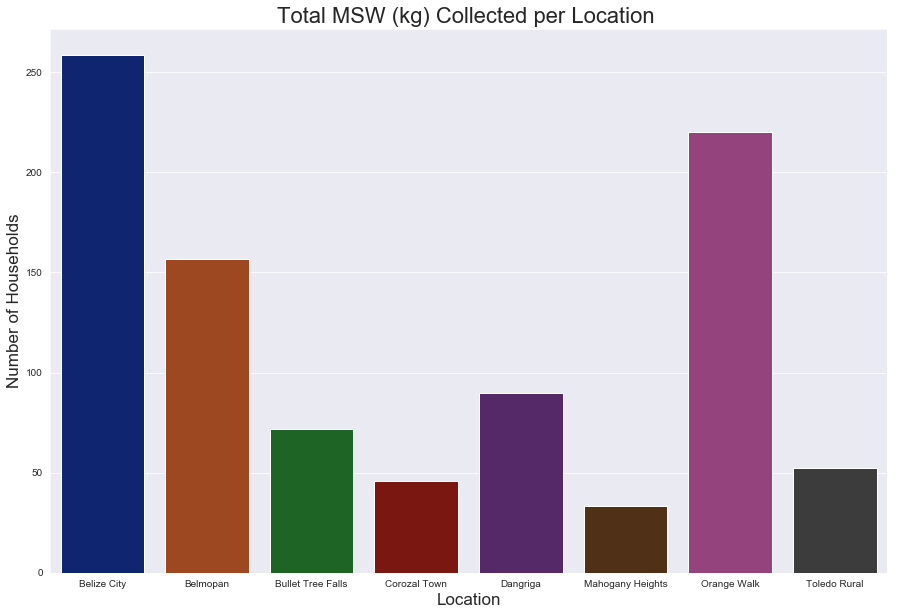

In [81]:
plt.figure(figsize=(15, 10));

location_order = ['Belize City',
                  'Belmopan',
                  'Bullet Tree Falls',
                  'Corozal Town',
                  'Dangriga',
                  'Mahogany Heights',
                  'Orange Walk',
                  'Toledo Rural']
         
sns.barplot('Location',
            'Total_weight (kg)',
            data=belize_eda_model,
            order=location_order,
            estimator=np.sum,
            palette='dark',
            ci=0);

# sns.countplot('Location',
#               data=belize_eda_model,
#               order=location_order);

plt.title('Total MSW (kg) Collected per Location ', fontsize=22);
plt.xlabel('Location', fontsize=17);
plt.ylabel('Number of Households', fontsize=17);

**Here we can see the number of households visited per location.  Only 3 locations (Bullet Tree Falls, Corozal Town, and Mahogany Heights) do not reach the sample size of 30 typically required for the central limit theorem to apply.  This is noteworthy, and is something to be considered for future work.**

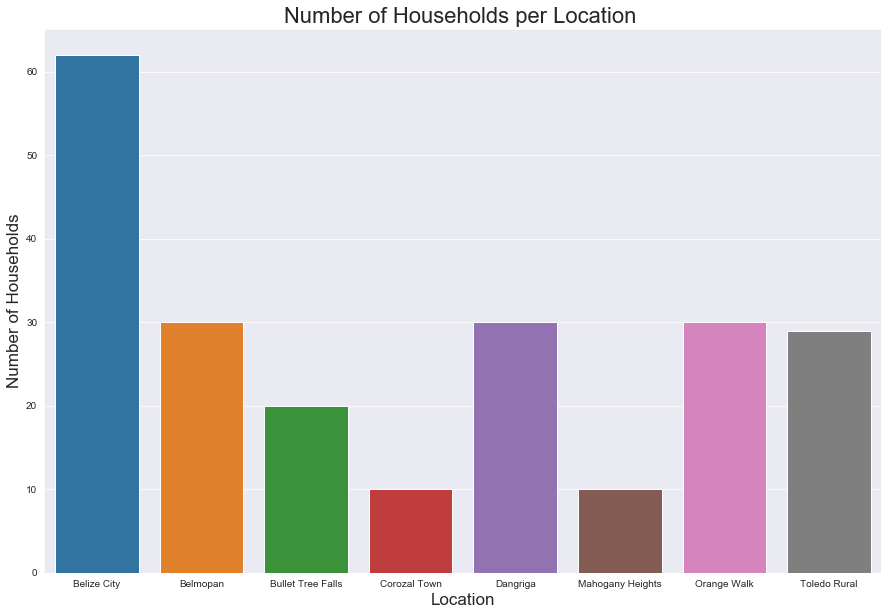

In [68]:
plt.figure(figsize=(15, 10));

location_order = ['Belize City',
                  'Belmopan',
                  'Bullet Tree Falls',
                  'Corozal Town',
                  'Dangriga',
                  'Mahogany Heights',
                  'Orange Walk',
                  'Toledo Rural']
         
sns.countplot('Location',
              data=belize_eda_model,
              order=location_order);

plt.title('Number of Households per Location ', fontsize=22);
plt.xlabel('Location', fontsize=17);
plt.ylabel('Number of Households', fontsize=17);

### MSW Composition per Location

Number of Households per Location:
 Belize City          62
Orange Walk          30
Dangriga             30
Belmopan             30
Toledo Rural         29
Bullet Tree Falls    20
Corozal Town         10
Mahogany Heights     10
Name: Location, dtype: int64


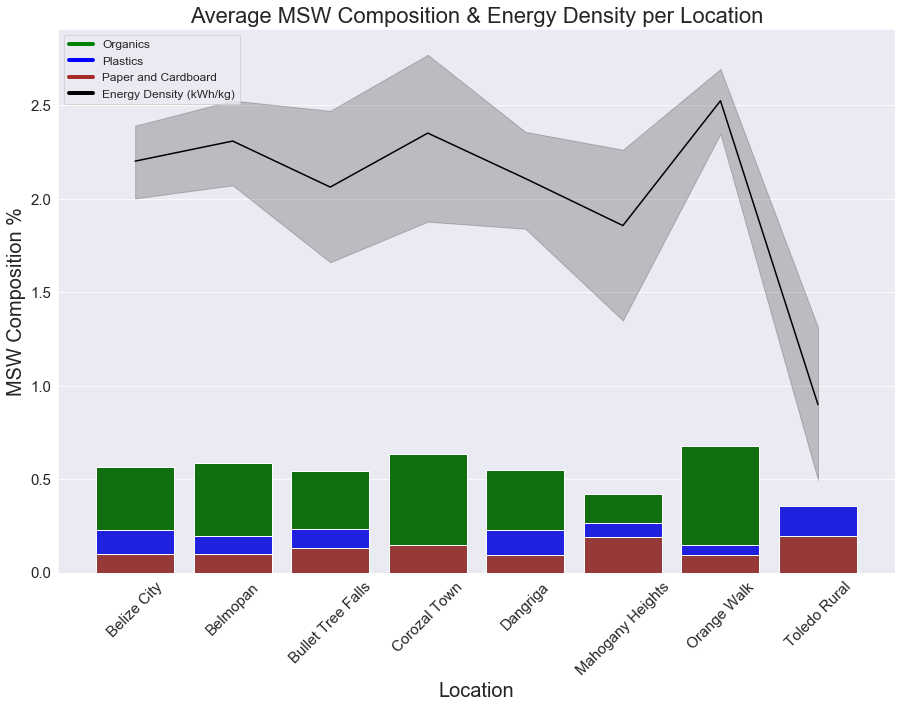

In [69]:
plt.figure(figsize=(15, 10));
print('Number of Households per Location:\n', belize_eda_model['Location'].value_counts())

location_order = ['Belize City',
                  'Belmopan',
                  'Bullet Tree Falls',
                  'Corozal Town',
                  'Dangriga',
                  'Mahogany Heights',
                  'Orange Walk',
                  'Toledo Rural']

sns.barplot('Location',
            'Organics_wt_%',
            data=belize_eda_model,
            color='Green',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Plastics_wt_%',
            data=belize_eda_model,
            color='Blue',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Paper_and_cardboard_wt_%',
            data=belize_eda_model,
            color='Brown',
#             estimator=np.median,
            ci=0,
            order=location_order);

# belize_eda_model_reduced = belize_eda_model.copy()
# belize_eda_model_reduced['energy_kWh_per_kg'] = belize_eda_model_reduced['energy_kWh_per_kg'] / 10 

sns.lineplot('Location',
             'energy_kWh_per_kg',
             data=belize_eda_model,
#              estimator=np.median,
             color='Black');

plt.title('Average MSW Composition & Energy Density per Location', fontsize=22);
plt.xticks(rotation=45, fontsize=15);
plt.xlabel('Location', fontsize=20);
plt.yticks(fontsize=15);
plt.ylabel('MSW Composition %', fontsize=20);
# plt.ylim(0, 1.5)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='Green', lw=4),
                Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Brown', lw=4),
                Line2D([0], [0], color='Black', lw=4)]

plt.legend(custom_lines, ['Organics',
                          'Plastics',
                          'Paper and Cardboard',
                          'Energy Density (kWh/kg)'],
           fontsize=12);
#            title='Waste Type',
#            title_fontsize=18);

In [31]:
belize_eda_model[belize_eda_model['Location'] == 'Toledo Rural']['Wastedisposalgeneral'].value_counts(dropna=False)

disp_burn       24
other            2
disp_bury        2
disp_collect     1
Name: Wastedisposalgeneral, dtype: int64

In [32]:
belize_eda_model[belize_eda_model['Location'] == 'Toledo Rural']['Wastedisposalgreen'].value_counts(dropna=False)

other             21
disp_burn          6
disp_land_dump     2
Name: Wastedisposalgreen, dtype: int64

In [33]:
belize_eda_model[belize_eda_model['Location'] == 'Toledo Rural']['Wastedisposalnappies'].value_counts(dropna=False)

disp_burn    28
other         1
Name: Wastedisposalnappies, dtype: int64

### MSW Composition per Urbanity

Number of Households per Urbanity:
 Urban       92
Regional    70
Rural       59
Name: Urbanity, dtype: int64


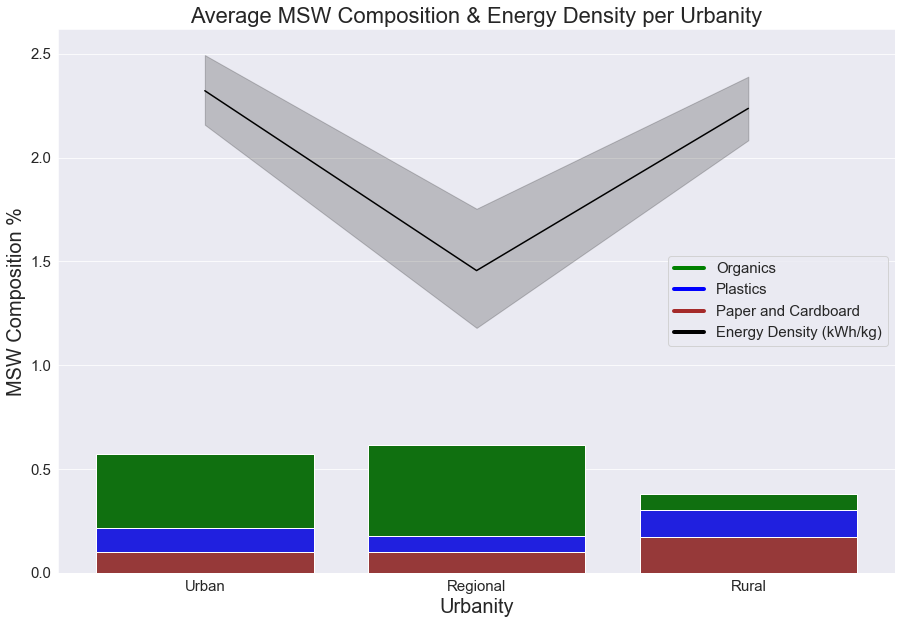

In [38]:
plt.figure(figsize=(15, 10));
print('Number of Households per Urbanity:\n', belize_eda_model['Urbanity'].value_counts())

sns.barplot('Urbanity',
            'Organics_wt_%',
            data=belize_eda_model,
            color='Green',
#             estimator=np.median,
            ci=0);

sns.barplot('Urbanity',
            'Plastics_wt_%',
            data=belize_eda_model,
            color='Blue',
#             estimator=np.median,
            ci=0);

sns.barplot('Urbanity',
            'Paper_and_cardboard_wt_%',
            data=belize_eda_model,
            color='Brown',
#             estimator=np.median,
            ci=0);

sns.lineplot('Urbanity',
             'energy_kWh_per_kg',
             data=belize_eda_model,
#              estimator=np.median,
             color='Black');

plt.title('Average MSW Composition & Energy Density per Urbanity', fontsize=22);
plt.xticks(fontsize=15);
plt.xlabel('Urbanity', fontsize=20);
plt.yticks(fontsize=15);
plt.ylabel('MSW Composition %', fontsize=20);
# plt.ylim(0, 1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='Green', lw=4),
                Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Brown', lw=4),
                Line2D([0], [0], color='Black', lw=4)]

plt.legend(custom_lines, ['Organics',
                          'Plastics',
                          'Paper and Cardboard',
                          'Energy Density (kWh/kg)'],
           fontsize=15)
#            title='Waste Type',
#            title_fontsize=18);

## Economics and Waste

**Let's have a look at these columns and see how much useful economic info we have.**

In [39]:
income_features = ['Incometotal',
                   'Grocerytotal',
                   'Groceryexpenses',
                   'Groceryperiodnum',
                   'Housenumberpeopleincome']

for feature in income_features:
    print(f'{feature} Value Counts:')
    print(belize_eda_model[feature].value_counts(normalize=True, dropna=False).head(10))
    print('------------------------')

Incometotal Value Counts:
Unknown        0.610860
0.0            0.085973
1500.0         0.027149
2000.0         0.022624
1071.428571    0.018100
1000.0         0.013575
700.0          0.009050
2142.857143    0.009050
535.7142857    0.009050
1714.285714    0.009050
Name: Incometotal, dtype: float64
------------------------
Grocerytotal Value Counts:
Unknown        0.402715
428.5714286    0.085973
642.8571429    0.058824
857.1428571    0.049774
214.2857143    0.036199
300.0          0.031674
0.0            0.027149
750.0          0.022624
321.4285714    0.018100
400.0          0.018100
Name: Grocerytotal, dtype: float64
------------------------
Groceryexpenses Value Counts:
Unknown    0.389140
200.0      0.095023
100.0      0.063348
300.0      0.054299
150.0      0.054299
250.0      0.040724
50.0       0.036199
0.0        0.031674
500.0      0.027149
400.0      0.027149
Name: Groceryexpenses, dtype: float64
------------------------
Groceryperiodnum Value Counts:
Unknown    0.371041
7.0 

**As is evident above, the Incometotal feature has 60%+ 'Unknown' values.  We have other economic indicators however, namely grocery expenses.  The Grocerytotal feature is a monthly figure, and can be used as an indicator of economic status. There are still a lot of 'Unknown' values (40%) but if we want to attempt to make any analysis about any economic factors then we will have to drop some rows**

In [40]:
print('Rows before reduction:', belize_eda_model.shape[0])
belize_eda_model_income = belize_eda_model[belize_eda_model['Grocerytotal'] != 'Unknown'] 

print('Shape after reduction:', belize_eda_model_income.shape[0])
print('------------------------')
print(f'Loss of {belize_eda_model.shape[0] - belize_eda_model_income.shape[0]} rows for the\
 economic analysis!')

belize_eda_model_income.head()

Rows before reduction: 221
Shape after reduction: 132
------------------------
Loss of 89 rows for the economic analysis!


,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
1,39,pt_household,Belmopan,Urban,17.2446,-88.7685,1,yes,yes,p_3days,2,half_full,yes,2,disp_collect,disp_collect,other,0,7,0,2,0,1,own,0,yes,0.760519,0.050493,0.171676,0.017312,8.318,2.90,24.12,3.5,0.200,0.206,0.229,0.192,0.079,0.000,0.000,0.158,0.0,2.157,0.522,0.212,0.000,0.000,0.000,4.169,0.050,0.053,0.091,0.0,0.000,0.000,0.000,0.000,0.0,0.0
5,34,pt_household,Belmopan,Urban,17.2519,-88.7679,0,yes,no,p_3days,5,half_full,no,0,disp_collect,other,other,200,30,200,2,0,2,own,3000,yes,0.490176,0.335342,0.134268,0.040215,7.634,2.25,17.18,3.5,0.087,0.300,0.085,0.084,0.208,0.243,0.914,0.675,0.0,0.000,0.018,1.384,0.000,0.153,0.667,2.161,0.097,0.017,0.137,0.0,0.404,0.000,0.000,0.000,0.0,0.0
6,35,pt_household,Belmopan,Urban,17.2432,-88.7655,1,yes,no,p_week,5,half_full,no,20,disp_collect,disp_collect,other,250,30,250,2,0,1,rent,0,yes,0.070561,0.025038,0.227618,0.676783,2.636,0.28,0.74,7.0,0.090,0.222,0.136,0.117,0.035,0.000,0.000,0.000,0.0,0.000,0.000,0.066,0.000,0.000,0.000,0.186,0.000,0.000,0.000,0.0,0.000,0.000,1.340,0.444,0.0,0.0
10,42,pt_household,Belmopan,Urban,17.2429,-88.767,0,yes,no,p_3days,5,full,yes,50,disp_collect,disp_collect,disp_collect,150,7,642.857,1,3,0,rent,Unknown,yes,0.715135,0.096672,0.121632,0.066561,5.048,2.72,13.73,3.5,0.073,0.170,0.100,0.010,0.176,0.000,0.160,0.000,0.0,0.000,0.085,0.283,0.000,0.000,0.148,3.302,0.205,0.084,0.208,0.0,0.000,0.044,0.000,0.000,0.0,0.0
12,41,pt_household,Belmopan,Urban,17.2446,-88.7685,0,yes,no,p_3days,4,half_full,yes,10,disp_collect,disp_collect,disp_collect,200,14,428.571,2,1,2,rent,0,yes,0.781575,0.021545,0.018574,0.178306,2.692,2.54,6.84,3.5,0.010,0.016,0.000,0.012,0.012,0.000,1.265,0.000,0.0,0.000,0.000,0.005,0.025,0.000,0.026,0.813,0.035,0.006,0.000,0.0,0.018,0.000,0.449,0.000,0.0,0.0


428.571429     19
642.857143     13
857.142857     11
214.285714      8
300.000000      7
0.000000        6
750.000000      5
535.714286      4
1071.428571     4
400.000000      4
Name: Grocerytotal, dtype: int64


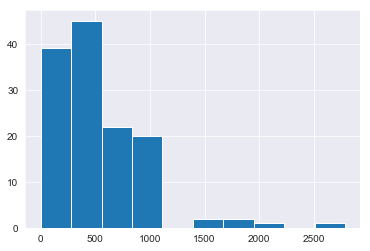

In [41]:
#Change feature type to float
belize_eda_model_income['Grocerytotal'] = belize_eda_model_income['Grocerytotal'].astype(float)

#Look at feature distribution
belize_eda_model_income['Grocerytotal'].hist();

print(belize_eda_model_income['Grocerytotal'].value_counts().head(10))

Rows remaining: 120


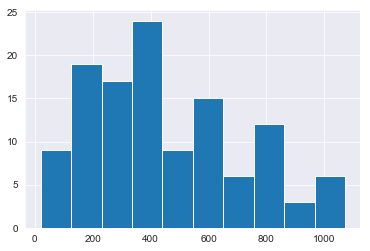

In [42]:
#Remove high end outliers as well as those with a value of 0
belize_eda_model_income = belize_eda_model_income[
    (
        belize_eda_model_income['Grocerytotal'] < 1500
    ) & 
    (
        belize_eda_model_income['Grocerytotal'] > 0
    )]
belize_eda_model_income['Grocerytotal'].hist();
print('Rows remaining:', belize_eda_model_income.shape[0])

#### Create Grocery Expenses Category Function

In [43]:
def grocery_expenses_categories(expenses):
    if expenses < 200:
        expenses = 'Less than $200'
        return expenses
    elif expenses >= 200 and expenses < 400:
        expenses = '$200 and 400'
        return expenses
    elif expenses >= 400 and expenses < 600:
        expenses = '$400 and 600'
        return expenses
    elif expenses >= 600 and expenses < 800:
        expenses = '$600 and 800'
        return expenses
    else:
        expenses = 'More than $800'
        return expenses
        
belize_eda_model_income['Monthly_grocery_expenses_cat'] = belize_eda_model_income['Grocerytotal'].map(lambda x: grocery_expenses_categories(x))
print(belize_eda_model_income['Monthly_grocery_expenses_cat'].value_counts())
belize_eda_model_income.head()

$400 and 600      32
$200 and 400      30
More than $800    21
$600 and 800      21
Less than $200    16
Name: Monthly_grocery_expenses_cat, dtype: int64


,ID,Premisestype,Location,Urbanity,Locationlat,Locationlong,Binsnumber,Collectionavailable,Collectioninfo,Collectionperiod,Collectionrating,Collectionwastelevelwhenta,Collectionrubbishbagsupport,Collectionwillingtopay,Wastedisposalgeneral,Wastedisposalgreen,Wastedisposalnappies,Groceryexpenses,Groceryperiodnum,Grocerytotal,Housenumberpeople,Housenumberchildren,Housenumberpeopleincome,Houseownership,Incometotal,Levysupport,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass,Monthly_grocery_expenses_cat
5,34,pt_household,Belmopan,Urban,17.2519,-88.7679,0,yes,no,p_3days,5,half_full,no,0,disp_collect,other,other,200,30,200.000000,2,0,2,own,3000,yes,0.490176,0.335342,0.134268,0.040215,7.634,2.25,17.18,3.5,0.087,0.300,0.085,0.084,0.208,0.243,0.914,0.675,0.0,0.0,0.018,1.384,0.000,0.153,0.667,2.161,0.097,0.017,0.137,0.00,0.404,0.000,0.000,0.000,0.0,0.0,$200 and 400
6,35,pt_household,Belmopan,Urban,17.2432,-88.7655,1,yes,no,p_week,5,half_full,no,20,disp_collect,disp_collect,other,250,30,250.000000,2,0,1,rent,0,yes,0.070561,0.025038,0.227618,0.676783,2.636,0.28,0.74,7.0,0.090,0.222,0.136,0.117,0.035,0.000,0.000,0.000,0.0,0.0,0.000,0.066,0.000,0.000,0.000,0.186,0.000,0.000,0.000,0.00,0.000,0.000,1.340,0.444,0.0,0.0,$200 and 400
10,42,pt_household,Belmopan,Urban,17.2429,-88.767,0,yes,no,p_3days,5,full,yes,50,disp_collect,disp_collect,disp_collect,150,7,642.857143,1,3,0,rent,Unknown,yes,0.715135,0.096672,0.121632,0.066561,5.048,2.72,13.73,3.5,0.073,0.170,0.100,0.010,0.176,0.000,0.160,0.000,0.0,0.0,0.085,0.283,0.000,0.000,0.148,3.302,0.205,0.084,0.208,0.00,0.000,0.044,0.000,0.000,0.0,0.0,$600 and 800
12,41,pt_household,Belmopan,Urban,17.2446,-88.7685,0,yes,no,p_3days,4,half_full,yes,10,disp_collect,disp_collect,disp_collect,200,14,428.571429,2,1,2,rent,0,yes,0.781575,0.021545,0.018574,0.178306,2.692,2.54,6.84,3.5,0.010,0.016,0.000,0.012,0.012,0.000,1.265,0.000,0.0,0.0,0.000,0.005,0.025,0.000,0.026,0.813,0.035,0.006,0.000,0.00,0.018,0.000,0.449,0.000,0.0,0.0,$400 and 600
15,45,pt_household,Belmopan,Urban,17.2428,-88.7676,2,yes,no,p_3days,5,half_full,no,12,disp_collect,disp_land_dump,other,35,2,525.000000,1,0,1,own,700,yes,0.469758,0.136694,0.354032,0.039516,2.480,2.18,5.41,3.5,0.000,0.148,0.037,0.000,0.088,0.185,0.000,0.234,0.0,0.0,0.420,0.086,0.000,0.000,0.218,0.827,0.000,0.000,0.098,0.12,0.019,0.000,0.000,0.000,0.0,0.0,$400 and 600


#### Grocery Expenses Distribution

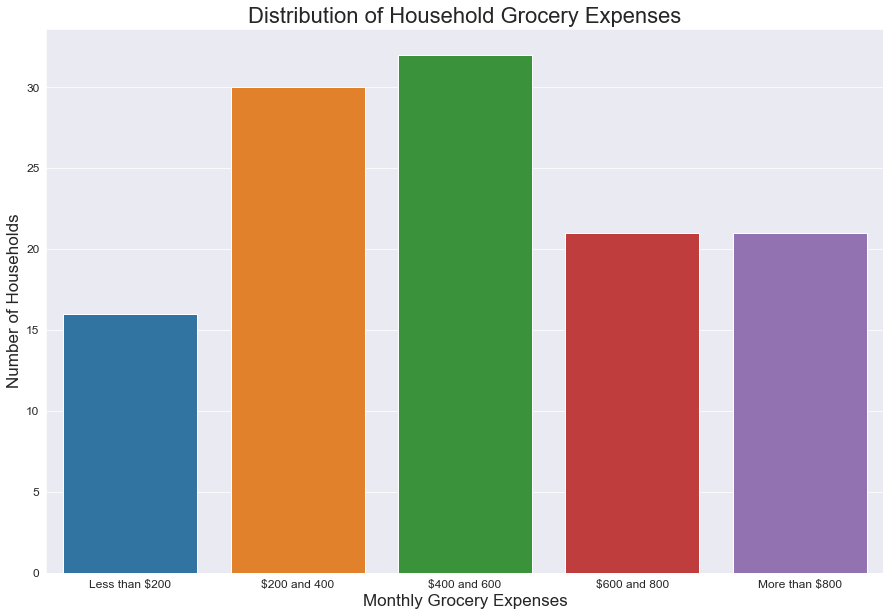

In [44]:
order = ['Less than $200',
         '$200 and 400',
         '$400 and 600',
         '$600 and 800',
         'More than $800']

plt.figure(figsize=(15, 10))
sns.countplot('Monthly_grocery_expenses_cat',
                data=belize_eda_model_income,
                order=order);

plt.title('Distribution of Household Grocery Expenses', fontsize=22);
plt.xticks(fontsize=12);
plt.xlabel('Monthly Grocery Expenses', fontsize=17);
plt.yticks(fontsize=12);
plt.ylabel('Number of Households', fontsize=17);
# l = plt.legend(loc='best',
#            labels=['Less than $500',
#                    'Between $500 and 1000',
#                    'More than $1000'], fontsize=10)
# l.set_title('Monthly Grocery Expenses')

**We see a fairly even distribution here, with more of a concentration of homes being in the mid-range betweeen $200 and 600**

**More data would be requested for future works of this sort to ensure that an even representation of all economic classes is available for analysis**

#### Grocery Expenses vs Energy Density

$400 and 600      32
$200 and 400      30
More than $800    21
$600 and 800      21
Less than $200    16
Name: Monthly_grocery_expenses_cat, dtype: int64


(0, 4)

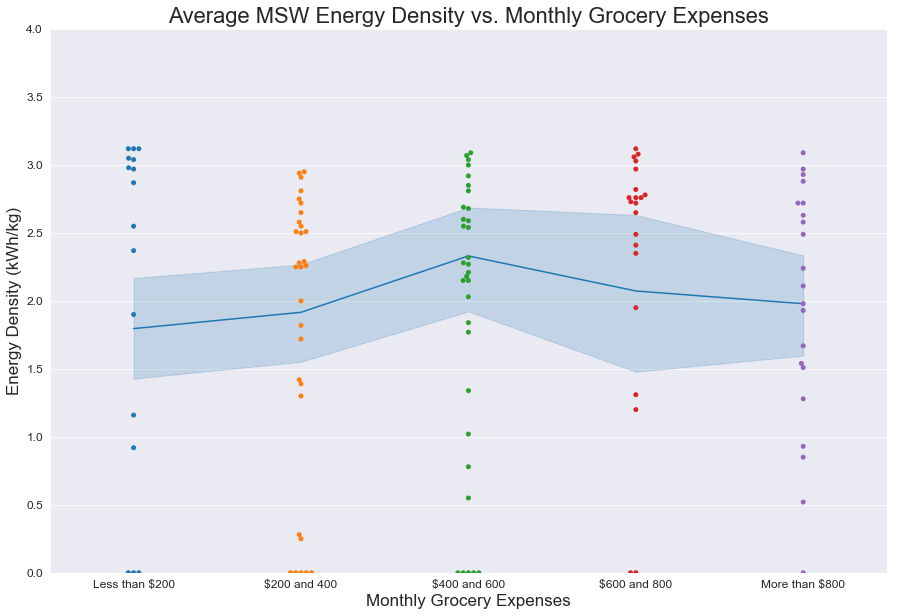

In [54]:
print(belize_eda_model_income['Monthly_grocery_expenses_cat'].value_counts())

order = ['Less than $200',
         '$200 and 400',
         '$400 and 600',
         '$600 and 800',
         'More than $800']

plt.figure(figsize=(15, 10))

sns.swarmplot('Monthly_grocery_expenses_cat',
              'energy_kWh_per_kg',
              data=belize_eda_model_income,
              order=order);

sns.lineplot('Monthly_grocery_expenses_cat',
              'energy_kWh_per_kg',
              data=belize_eda_model_income);
#               estimator=np.median);

plt.title('Average MSW Energy Density vs. Monthly Grocery Expenses', fontsize=22);
plt.xticks(fontsize=12);
plt.xlabel('Monthly Grocery Expenses', fontsize=17);
plt.yticks(fontsize=12);
plt.ylabel('Energy Density (kWh/kg)', fontsize=17);
plt.ylim(0, 4)

# Solomon Islands

## Import Data

In [10]:
#Bring in qualitative dataset
solomon_df_qual = pd.read_csv('Solid_waste_audit_Solomon_Islands_Interviews.csv',
                      index_col='RecordID').reset_index()
print('Shape of Dataset:', solomon_df_qual.shape)
solomon_df_qual.rename(columns={'RecordID':'ID'}, inplace=True)
solomon_df_qual.head()

Shape of Dataset: (181, 73)


,ID,HouseholdCommercialShipID,TotalsampleweightKG,Amountwillingtopayforrubbishbag,Amountwillingtopayforwastecollection,AreaorIslandName,Collectionservicerating,DailyDiet1,DailyDiet2,DailyDiet3,Diet1source,Diet2source,Diet3source,Electricityexpensesper,EstimatedMonthlyIncome,GarbageCollectionType,GroceryexpensesUS,Groceryexpensesper,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,Incomesource,InformationreceivedaboutWasteCollectionServices,MonthlyIncomeUS,NumberofBins,Numberofemployedpeopleinfamily,Numberofpeopleinhousehold,Radio,Reasonforrating,Softdrinkcansperweek,Suggestionsforimprovement,Supportforlevy,Supportforrubbishbag,SurveyDate,Totalelectricityexpenses,Transportationexpensesper,Transportationexpensestotal,WasteDisposalMethodBulky,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,WasteLevelwhencollectionarrives,Wasteburned,Waterbottlesperweek,Weather,WeeklyElectricityexpenses,WeeklyGroceryExpenses,WeeklyTransportationExpenses,GeneralWasteCollect,GreenWasteCollect,SanitaryWasteCollect,BulkyWasteCollect,GeneralWasteTransport,GreenWasteTransport,SanitaryWasteTransport,BulkyWasteTransport,GeneralWasteDump,GreenWasteDump,SanitaryWasteDump,BulkyWasteDump,GeneralWasteBury,GreenWasteBury,SanitaryWasteBury,BulkyWasteBury,GeneralWasteBurn,GreenWasteBurn,SanitaryWasteBurn,BulkyWasteBurn,GeneralWasteWater,GreenWasteWater,SanitaryWasteWater,BulkyWasteWater,Collect
0,2,AH03_Sol,0.254,can if this system is in place,not sure,Ambu,NaN,vegetable,potatoes,Rice,produce,produce,buy,NaN,1400.0,None,12.48,NaN,Family,-8.73195,160.70519,employment; marketing,NO,174.72,plastic,4,10.0,NaN,NaN,NaN,each family to have a bit for tins to avoid br...,NaN,yes,12/03/2018 00:00:00,60,NaN,25,NaN,inside bags/ plastic burn,inside big hole,animal feed/ replant cabbage,NaN,NaN,0.0,raining,NaN,100.0,25.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,3,AH06_Sol,2.088,$0.05,$20,Ambu,NaN,rice/potato/kumera,Casawa,Banana,produce & buy,NaN,NaN,month,2000.0,None,6.24,fortnight,Own,-8.73195,160.70519,carporter; teacher; casual worked,NaN,249.60,1,4,9.0,yes,No service,1.0,NaN,Yes,YES,12/05/2018 00:00:00,50,NaN,NaN,NaN,burn,bury them (dogs take otherwise),Pig; burn,NaN,NaN,0.0,raining,NaN,50.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2,4,AH09_Sol,1.410,$20,$50 per day,Ambu,NaN,rice,potato; taro,root grobs,buy,produce,produce,day,1200.0,None,24.96,NaN,Own,-8.73195,160.70519,teacher,NaN,149.76,NO,1,8.0,NaN,NaN,1.0,NaN,NaN,yes; support this system,12/03/2018 00:00:00,60,day,100,NaN,throw inside pit,inside the pit,burn,NaN,NaN,0.0,Runny,NaN,200.0,700.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,5,AH10_Sol,2.774,Yes,$50 fortnightly,Ambu,NaN,potato/ cassara,Rice,Vegetables,produceotato/ cassara,buy,produce,month,3000.0,None,6.24,NaN,Own,-8.73195,160.70519,teacher,Yes; company in Auki,374.40,1,1,4.0,yes,NaN,1.0,NaN,NaN,Yes,12/03/2018 00:00:00,50,NaN,NaN,abandon it,throw - old pits from toilets,wash and resuse (throw away diapers),collect - too much to compost,NaN,NaN,0.0,raining,NaN,50.0,100.0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,6,AH11_Sol,3.030,$2,$20,Ambu,NaN,rice/cabbage,Casarra/ kumera,Fish,produce or buy,produce,buy,month,3000.0,None,24.96,NaN,Own,-8.73195,160.70519,teacher,NaN,374.40,1,1,6.0,no,no service,NaN,NaN,NaN,yes,12/03/2018 00:00:00,50,day,10,NaN,bag them then burn,NaN,pig; burn,NaN,NaN,0.0,sunny,NaN,200.0,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [11]:
#Bring in EDA dataset from modeling notebook
solomon_eda_model = pd.read_csv('Solomon - EDA_DataFrame.csv', index_col='Unnamed: 0')
print('Shape of Dataset:', solomon_eda_model.shape)
solomon_eda_model.head()

Shape of Dataset: (231, 31)


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Date,Commercial,Location,commercial,cardboard,paper,eps,plastic bags,flexibles/film,other plastic,glass jars,food,textles,other organics,aluminium cans,steel cans,lpb,pp,pet bottles,nappies,aluminium recyclable,other batteries,other
0,1,0.183104,0.021827,0.030315,0.183104,4.948,0.60,2.97,2020-12-05,0.0,Guadalcanal,0.0,0.108,0.0,0.000,0.000,0.084,0.014,0.0,0.000,0.0,3.784,0.360,0.344,0.0,0.0,0.052,0.0,0.0,0.202,0.0
1,2,0.778178,0.000000,0.051232,0.170590,7.222,2.55,18.42,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.000,0.052,0.196,0.026,0.0,0.000,0.0,5.620,0.716,0.516,0.0,0.0,0.096,0.0,0.0,0.000,0.0
2,3,0.929521,0.020612,0.012301,0.037566,12.032,2.99,35.98,2020-12-05,0.0,Guadalcanal,0.0,0.248,0.0,0.000,0.000,0.140,0.006,0.0,11.184,0.0,0.000,0.344,0.108,0.0,0.0,0.002,0.0,0.0,0.000,0.0
3,4,0.955752,0.000000,0.044248,0.000000,0.452,3.11,1.41,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.000,0.008,0.000,0.012,0.0,0.000,0.0,0.432,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,5,0.980088,0.000000,0.019912,0.000000,10.848,3.12,33.85,2020-12-05,0.0,Guadalcanal,0.0,0.000,0.0,0.004,0.088,0.000,0.000,0.0,0.000,0.0,10.632,0.000,0.000,0.0,0.0,0.124,0.0,0.0,0.000,0.0


## Qualitative EDA

In [12]:
solomon_df_qual.head(15)

,ID,HouseholdCommercialShipID,TotalsampleweightKG,Amountwillingtopayforrubbishbag,Amountwillingtopayforwastecollection,AreaorIslandName,Collectionservicerating,DailyDiet1,DailyDiet2,DailyDiet3,Diet1source,Diet2source,Diet3source,Electricityexpensesper,EstimatedMonthlyIncome,GarbageCollectionType,GroceryexpensesUS,Groceryexpensesper,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,Incomesource,InformationreceivedaboutWasteCollectionServices,MonthlyIncomeUS,NumberofBins,Numberofemployedpeopleinfamily,Numberofpeopleinhousehold,Radio,Reasonforrating,Softdrinkcansperweek,Suggestionsforimprovement,Supportforlevy,Supportforrubbishbag,SurveyDate,Totalelectricityexpenses,Transportationexpensesper,Transportationexpensestotal,WasteDisposalMethodBulky,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,WasteLevelwhencollectionarrives,Wasteburned,Waterbottlesperweek,Weather,WeeklyElectricityexpenses,WeeklyGroceryExpenses,WeeklyTransportationExpenses,GeneralWasteCollect,GreenWasteCollect,SanitaryWasteCollect,BulkyWasteCollect,GeneralWasteTransport,GreenWasteTransport,SanitaryWasteTransport,BulkyWasteTransport,GeneralWasteDump,GreenWasteDump,SanitaryWasteDump,BulkyWasteDump,GeneralWasteBury,GreenWasteBury,SanitaryWasteBury,BulkyWasteBury,GeneralWasteBurn,GreenWasteBurn,SanitaryWasteBurn,BulkyWasteBurn,GeneralWasteWater,GreenWasteWater,SanitaryWasteWater,BulkyWasteWater,Collect
0,2,AH03_Sol,0.254,can if this system is in place,not sure,Ambu,NaN,vegetable,potatoes,Rice,produce,produce,buy,NaN,1400.0,None,12.48,NaN,Family,-8.73195,160.70519,employment; marketing,NO,174.72,plastic,4,10.0,NaN,NaN,NaN,each family to have a bit for tins to avoid br...,NaN,yes,12/03/2018 00:00:00,60,NaN,25,NaN,inside bags/ plastic burn,inside big hole,animal feed/ replant cabbage,NaN,NaN,0.0,raining,NaN,100.0,25.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,3,AH06_Sol,2.088,$0.05,$20,Ambu,NaN,rice/potato/kumera,Casawa,Banana,produce & buy,NaN,NaN,month,2000.0,None,6.24,fortnight,Own,-8.73195,160.70519,carporter; teacher; casual worked,NaN,249.60,1,4,9.0,yes,No service,1.0,NaN,Yes,YES,12/05/2018 00:00:00,50,NaN,NaN,NaN,burn,bury them (dogs take otherwise),Pig; burn,NaN,NaN,0.0,raining,NaN,50.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2,4,AH09_Sol,1.410,$20,$50 per day,Ambu,NaN,rice,potato; taro,root grobs,buy,produce,produce,day,1200.0,None,24.96,NaN,Own,-8.73195,160.70519,teacher,NaN,149.76,NO,1,8.0,NaN,NaN,1.0,NaN,NaN,yes; support this system,12/03/2018 00:00:00,60,day,100,NaN,throw inside pit,inside the pit,burn,NaN,NaN,0.0,Runny,NaN,200.0,700.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,5,AH10_Sol,2.774,Yes,$50 fortnightly,Ambu,NaN,potato/ cassara,Rice,Vegetables,produceotato/ cassara,buy,produce,month,3000.0,None,6.24,NaN,Own,-8.73195,160.70519,teacher,Yes; company in Auki,374.40,1,1,4.0,yes,NaN,1.0,NaN,NaN,Yes,12/03/2018 00:00:00,50,NaN,NaN,abandon it,throw - old pits from toilets,wash and resuse (throw away diapers),collect - too much to compost,NaN,NaN,0.0,raining,NaN,50.0,100.0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,6,AH11_Sol,3.030,$2,$20,Ambu,NaN,rice/cabbage,Casarra/ kumera,Fish,produce or buy,produce,buy,month,3000.0,None,24.96,NaN,Own,-8.73195,160.70519,teacher,NaN,374.40,1,1,6.0,no,no service,NaN,NaN,NaN,yes,12/03/2018 00:00:00,50,day,10,NaN,bag them then burn,NaN,pig; burn,NaN,NaN,0.0,sunny,NaN,200.0,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
5,7,AH13_Sol,1.986,50c to $1,50c to $1 is fine with me,Ambu,NaN,chicken,sweet potato,fish,buy,produce,buy,month,2000.0,None,87.36,NaN,Own,-8.73195,160.70519,private job,no,249.60,no bins,1,7.0,yes,no service,7.0,need to have a rubbish collection,NaN,Yes; I like this idea,12/03/2018 00:00:00,50,NaN,NaN,backyard disposal,backyard disposal,backyard disposal,backyard disposal,do not remember; about 1 full shopping bag,NaN,0.0,raining,NaN,700.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8,AH15_Sol,2.038,$10,$10,Am

In [13]:
#Inspect feature value counts
for column in solomon_df_qual.columns:
    print(f'{column} Value Counts:')
    print(solomon_df_qual[column].value_counts(normalize=True, dropna=False).head(10))
    print('Total Unique Values:', solomon_df_qual[column].nunique())
    print('----------------------------')

ID Value Counts:
40    0.016575
35    0.016575
37    0.016575
38    0.016575
39    0.016575
34    0.016575
41    0.016575
42    0.016575
33    0.016575
32    0.016575
Name: ID, dtype: float64
Total Unique Values: 100
----------------------------
HouseholdCommercialShipID Value Counts:
AH28_Sol    0.005525
R21_Sol     0.005525
R04_Sol     0.005525
R60_Sol     0.005525
R75_Sol     0.005525
H39_Sol     0.005525
H06_Sol     0.005525
H04_Sol     0.005525
AR26_Sol    0.005525
AH36_Sol    0.005525
Name: HouseholdCommercialShipID, dtype: float64
Total Unique Values: 181
----------------------------
TotalsampleweightKG Value Counts:
1.094    0.016575
1.810    0.011050
1.170    0.011050
1.478    0.011050
0.846    0.011050
0.168    0.011050
2.128    0.005525
8.108    0.005525
1.225    0.005525
0.950    0.005525
Name: TotalsampleweightKG, dtype: float64
Total Unique Values: 173
----------------------------
Amountwillingtopayforrubbishbag Value Counts:
50c         0.154696
$5          0.127072
$1.0

### Drop Unnecessary Columns

In [14]:
drop_columns = ['Amountwillingtopayforrubbishbag',
                'Amountwillingtopayforwastecollection',
                'Collectionservicerating',
                'DailyDiet1',
                'DailyDiet2',
                'DailyDiet3',
                'Diet1source',
                'Diet2source',
                'Diet3source',
                'Electricityexpensesper',
                'GroceryexpensesUS',
                'Groceryexpensesper',
                'Incomesource',
                'InformationreceivedaboutWasteCollectionServices',
                'NumberofBins',
                'Numberofemployedpeopleinfamily',
                'Radio',
                'Reasonforrating',
                'Softdrinkcansperweek',
                'Suggestionsforimprovement',
                'Supportforlevy',
                'Supportforrubbishbag',
                'Totalelectricityexpenses',
                'Transportationexpensesper',
                'Transportationexpensestotal',
                'WasteDisposalMethodBulky',
                'WasteLevelwhencollectionarrives',
                'Weather',
                'WeeklyElectricityexpenses',
                'GeneralWasteCollect',
                'GreenWasteCollect',
                'SanitaryWasteCollect',
                'Wasteburned',
                'BulkyWasteCollect',
                'GeneralWasteTransport',
                'GreenWasteTransport',
                'SanitaryWasteTransport',
                'BulkyWasteTransport',
                'GeneralWasteDump',
                'GreenWasteDump',
                'SanitaryWasteDump',
                'BulkyWasteDump',
                'GeneralWasteBury',
                'GreenWasteBury',
                'SanitaryWasteBury',
                'BulkyWasteBury',
                'GeneralWasteBurn',
                'GreenWasteBurn',
                'SanitaryWasteBurn',
                'BulkyWasteBurn',
                'GeneralWasteWater',
                'GreenWasteWater',
                'SanitaryWasteWater',
                'BulkyWasteWater',
                'Collect']
solomon_df_qual = solomon_df_qual.drop(drop_columns, axis=1)
print(solomon_df_qual.shape)
solomon_df_qual.head()

(181, 18)


,ID,HouseholdCommercialShipID,TotalsampleweightKG,AreaorIslandName,EstimatedMonthlyIncome,GarbageCollectionType,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,MonthlyIncomeUS,Numberofpeopleinhousehold,SurveyDate,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,Waterbottlesperweek,WeeklyGroceryExpenses,WeeklyTransportationExpenses
0,2,AH03_Sol,0.254,Ambu,1400.0,None,Family,-8.73195,160.70519,174.72,10.0,12/03/2018 00:00:00,inside bags/ plastic burn,inside big hole,animal feed/ replant cabbage,0.0,100.0,25.0
1,3,AH06_Sol,2.088,Ambu,2000.0,None,Own,-8.73195,160.70519,249.60,9.0,12/05/2018 00:00:00,burn,bury them (dogs take otherwise),Pig; burn,0.0,50.0,20.0
2,4,AH09_Sol,1.410,Ambu,1200.0,None,Own,-8.73195,160.70519,149.76,8.0,12/03/2018 00:00:00,throw inside pit,inside the pit,burn,0.0,200.0,700.0
3,5,AH10_Sol,2.774,Ambu,3000.0,None,Own,-8.73195,160.70519,374.40,4.0,12/03/2018 00:00:00,throw - old pits from toilets,wash and resuse (throw away diapers),collect - too much to compost,0.0,50.0,100.0
4,6,AH11_Sol,3.030,Ambu,3000.0,None,Own,-8.73195,160.70519,374.40,6.0,12/03/2018 00:00:00,bag them then burn,NaN,pig; burn,0.0,200.0,70.0


### Generate GPS Coordinates for each Location

In [16]:
solomon_eda_model.groupby("Location").sum()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Commercial,commercial,cardboard,paper,eps,plastic bags,flexibles/film,other plastic,glass jars,food,textles,other organics,aluminium cans,steel cans,lpb,pp,pet bottles,nappies,aluminium recyclable,other batteries,other
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ambu,3243,19.436331,0.567514,1.474649,2.521506,100.8340,64.05,288.43,0.0,0.0,0.548,0.664,0.080,0.992,1.8600,0.560,0.296,76.7440,0.064,12.308,3.810,2.580,0.040,0.020,0.268,0.000,0.000,0.000,0.000
Arabella,9287,30.169003,1.841283,2.235095,2.754618,209.3540,100.33,587.27,0.0,0.0,3.610,1.020,0.000,1.200,4.2560,1.426,2.322,123.1180,2.812,56.314,5.476,2.008,0.000,0.132,2.918,0.000,0.000,0.762,1.980
Auki Commercial,3512,6.980420,4.874062,3.184540,0.960978,31.5660,27.91,66.46,0.0,0.0,5.734,2.370,0.242,0.859,2.6620,0.416,0.132,16.4680,0.183,0.142,0.800,0.570,0.096,0.000,0.660,0.104,0.000,0.000,0.128
Guadalcanal,3447,44.904472,3.855722,8.847000,21.811157,885.7776,155.35,1998.33,0.0,0.0,18.588,1.396,0.404,25.110,26.6696,3.644,2.600,155.4540,21.580,425.888,106.786,58.482,0.326,0.062,20.636,7.274,0.030,1.070,9.778
Honiara,6216,17.604969,4.002057,10.210733,8.182242,656.5412,66.72,1435.27,0.0,0.0,28.483,9.604,3.759,42.070,26.6000,10.465,9.702,199.9942,30.121,133.021,48.958,20.125,2.975,1.526,28.672,48.447,5.607,0.308,6.104
Kilusakwalo,3252,24.977252,2.101945,2.887989,3.032814,131.9960,83.83,361.78,0.0,0.0,2.114,3.486,0.140,0.868,2.8920,0.934,0.000,70.4400,0.152,26.288,5.644,2.840,0.056,0.124,1.184,12.462,2.228,0.144,0.000


In [201]:
sol_gps_keys = list(solomon_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlatitude'].keys())
sol_gps_lat_values = list(solomon_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlatitude'].values)
sol_gps_long_values = list(solomon_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlongitude'].values)

solomon_df_qual.groupby('AreaorIslandName').median()

,ID,TotalsampleweightKG,EstimatedMonthlyIncome,HouseholdGPSlatitude,HouseholdGPSlongitude,MonthlyIncomeUS,Numberofpeopleinhousehold,Waterbottlesperweek,WeeklyGroceryExpenses,WeeklyTransportationExpenses
AreaorIslandName,,,,,,,,,,
Ambu,10.5,1.9700,2000.0,-8.73195,160.705190,249.60,6.5,0.0,200.0,27.50
Arabella,11.5,2.3335,1200.0,-8.89920,160.759610,212.16,6.0,0.0,200.0,280.00
Guadal1,42.0,3.3580,18000.0,-9.46428,160.038850,2246.40,5.0,24.0,500.0,742.00
Guadal2,61.5,6.5190,4000.0,-9.45459,160.045220,499.20,6.0,4.0,300.0,300.00
Guadal3,32.5,4.3640,500.0,-9.44316,160.045530,62.40,4.5,3.0,100.0,60.00
Guadal5,39.0,6.2100,1800.0,-9.43209,160.036220,224.64,4.0,10.0,125.0,28.75
Honiara,76.5,1.5080,2750.0,-9.43182,159.933410,343.20,7.0,10.0,500.0,200.00
Honiara2,87.0,2.1820,3200.0,-9.45380,159.956920,399.36,9.0,10.0,300.0,130.00
Honiara3,93.5,2.7730,2000.0,-9.44569,159.959535,249.60,11.0,11.0,120.0,100.00


### Create Map to Display Sampling Locations

In [237]:
solomon_map = folium.Map(
    location=[-9.1016, 160.4718],
    zoom_start=9)

for idx, location in enumerate(zip(sol_gps_lat_values, sol_gps_long_values)):
    folium.Marker(location, popup=sol_gps_keys[idx]).add_to(solomon_map)

solomon_map.add_child(folium.LatLngPopup())

solomon_map

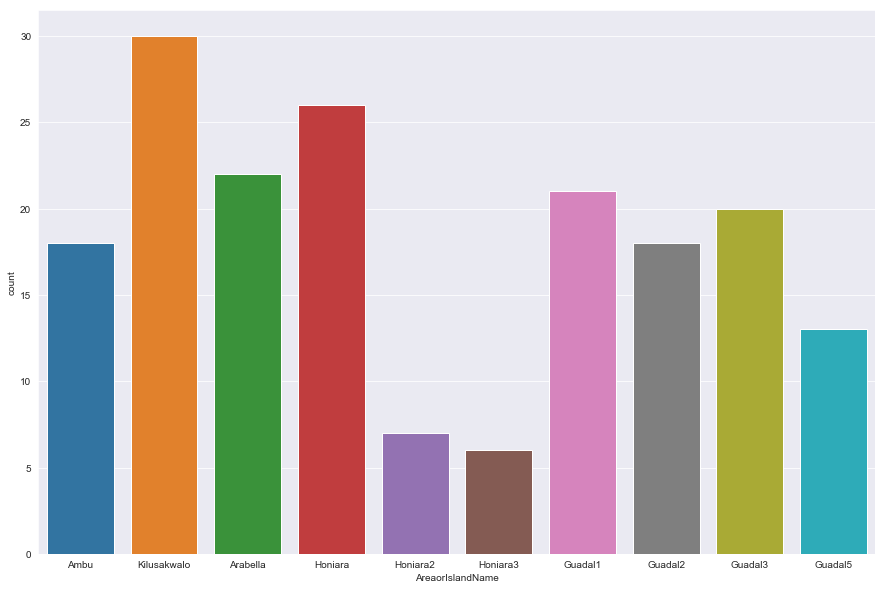

In [350]:
plt.figure(figsize=(15, 10))
sns.countplot('AreaorIslandName',
              data=solomon_df_qual)

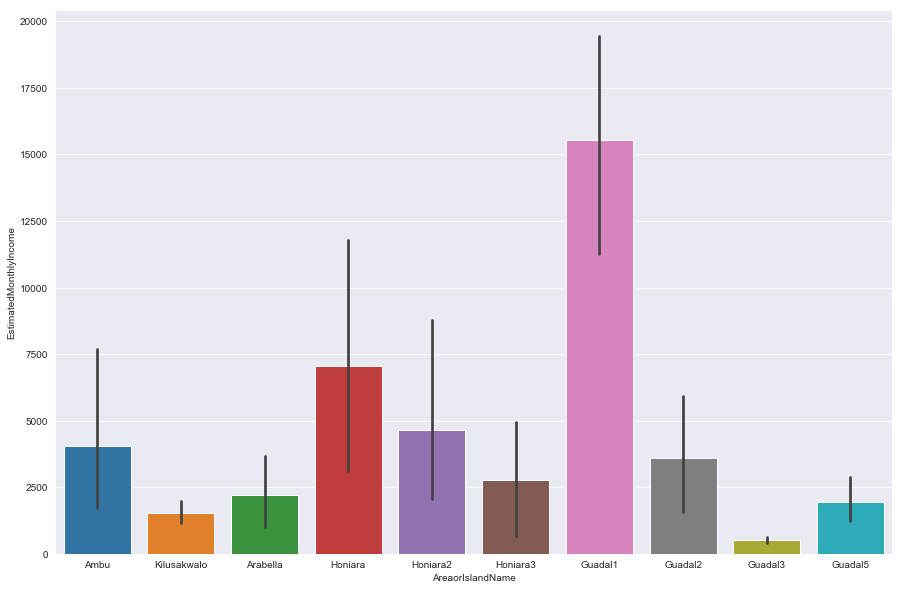

In [340]:
plt.figure(figsize=(15, 10))
sns.barplot('AreaorIslandName',
            'EstimatedMonthlyIncome',
            data=solomon_df_qual)

## Energy EDA

### Average Energy Density per Household

In [220]:
solomon_eda_model['energy_kWh_per_kg'].describe()

count    231.000000
mean       2.162511
std        1.062601
min        0.000000
25%        1.400000
50%        2.730000
75%        3.020000
max        3.120000
Name: energy_kWh_per_kg, dtype: float64

### Typical MSW Composition IQR

In [221]:
composition_list = ['Organics_wt_%', 'Paper_and_cardboard_wt_%', 'Plastics_wt_%']

for comp in composition_list:
    print(f'{comp} Bot IQR:', round(solomon_eda_model[comp].describe()['25%'] * 100, 1),'%')
    print(f'{comp} Top IQR:', round(solomon_eda_model[comp].describe()['75%'] * 100, 1),'%')
    print('--------------------------')

Organics_wt_% Bot IQR: 33.7 %
Organics_wt_% Top IQR: 92.8 %
--------------------------
Paper_and_cardboard_wt_% Bot IQR: 0.0 %
Paper_and_cardboard_wt_% Top IQR: 7.6 %
--------------------------
Plastics_wt_% Bot IQR: 2.2 %
Plastics_wt_% Top IQR: 16.6 %
--------------------------


### Number of Households per Location

In [317]:
solomon_eda_model.Location.value_counts()

Guadalcanal        80
Honiara            40
Arabella           37
Kilusakwalo        33
Ambu               24
Auki Commercial    16
Name: Location, dtype: int64

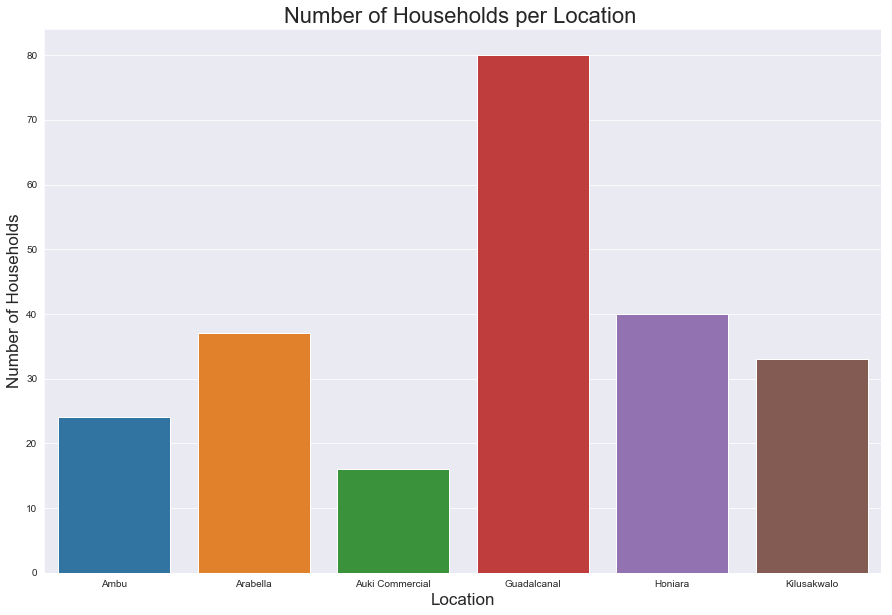

In [318]:
plt.figure(figsize=(15, 10));

location_order = ['Ambu',
                  'Arabella',
                  'Auki Commercial',
                  'Guadalcanal',
                  'Honiara',
                  'Kilusakwalo']
         
sns.countplot('Location',
              data=solomon_eda_model,
              order=location_order);

plt.title('Number of Households per Location ', fontsize=22);
plt.xlabel('Location', fontsize=17);
plt.ylabel('Number of Households', fontsize=17);

### MSW Composition per Location

Number of Households per Location:
 Guadalcanal        80
Honiara            40
Arabella           37
Kilusakwalo        33
Ambu               24
Auki Commercial    16
Name: Location, dtype: int64


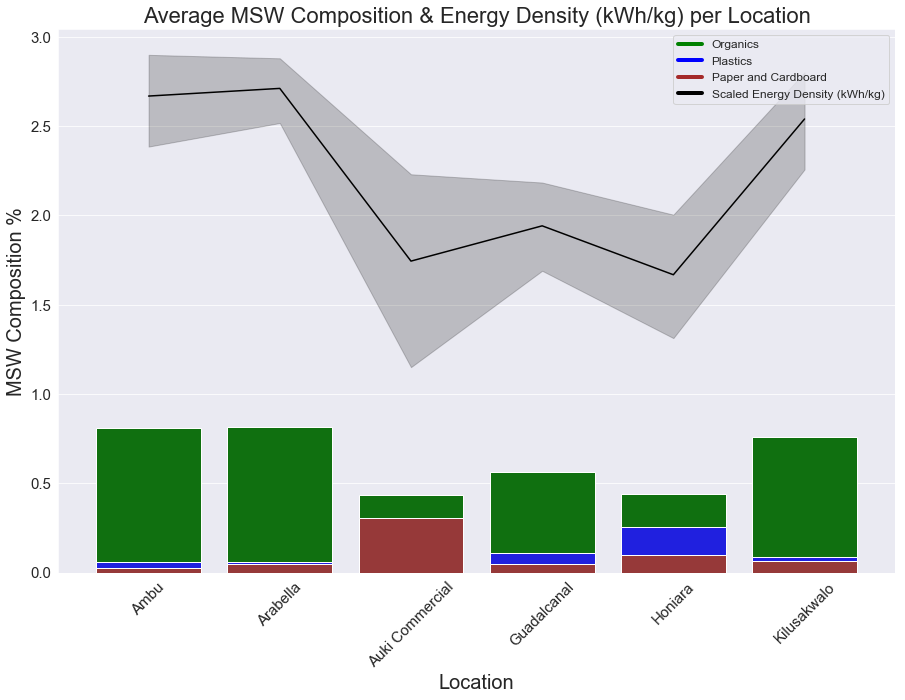

In [120]:
plt.figure(figsize=(15, 10));
print('Number of Households per Location:\n', solomon_eda_model['Location'].value_counts())

location_order = ['Ambu',
                  'Arabella',
                  'Auki Commercial',
                  'Guadalcanal',
                  'Honiara',
                  'Kilusakwalo']

sns.barplot('Location',
            'Organics_wt_%',
            data=solomon_eda_model,
            color='Green',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Plastics_wt_%',
            data=solomon_eda_model,
            color='Blue',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Paper_and_cardboard_wt_%',
            data=solomon_eda_model,
            color='Brown',
#             estimator=np.median,
            ci=0,
            order=location_order);

# solomon_eda_model_reduced = solomon_eda_model.copy()
# solomon_eda_model_reduced['energy_kWh_per_kg'] = solomon_eda_model_reduced['energy_kWh_per_kg'] / 10 

sns.lineplot('Location',
             'energy_kWh_per_kg',
             data=solomon_eda_model,
#              estimator=np.median,
             color='Black');

plt.title('Average MSW Composition & Energy Density (kWh/kg) per Location', fontsize=22);
plt.xticks(rotation=45, fontsize=15);
plt.xlabel('Location', fontsize=20);
plt.yticks(fontsize=15);
plt.ylabel('MSW Composition %', fontsize=20);
# plt.ylim(0, 1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='Green', lw=4),
                Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Brown', lw=4),
                Line2D([0], [0], color='Black', lw=4)]

plt.legend(custom_lines, ['Organics',
                          'Plastics',
                          'Paper and Cardboard',
                          'Energy Density (kWh/kg)'],
           fontsize=12);
#            title='Waste Type',
#            title_fontsize=18);

# Vanuatu

## Import Data

In [230]:
#Bring in qualitative dataset
vanuatu_df_qual = pd.read_csv('Solid_waste_audit_Vanuatu_Interviews.csv',
                      index_col='RecordID').reset_index()
print('Shape of Dataset:', vanuatu_df_qual.shape)
vanuatu_df_qual.rename(columns={'RecordID':'ID'}, inplace=True)
vanuatu_df_qual.head()

Shape of Dataset: (186, 74)


,ID,HouseholdCommercialShipID,TotalsampleweightKG,Amountwillingtopayforrubbishbag,Amountwillingtopayforwastecollection,AreaorIslandName,Collectionservicerating,DailyDiet1,DailyDiet2,DailyDiet3,Diet1source,Diet2source,Diet3source,Electricityexpensesper,EstimatedMonthlyIncome,GarbageCollectionType,GroceryexpensesUS,Groceryexpensesper,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,Incomesource,InformationreceivedaboutWasteCollectionServices,MonthlyIncomeUS,NumberofBins,Numberofemployedpeopleinfamily,Numberofpeopleinhousehold,Radio,Reasonforrating,Softdrinkcansperweek,Suggestionsforimprovement,Supportforlevy,Supportforrubbishbag,SurveyDate,Totalelectricityexpenses,Transportationexpensesper,Transportationexpensestotal,WasteDisposalMethodBulky,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,WasteLevelwhencollectionarrives,Wasteburned,Waterbottlesperweek,Weather,WeeklyElectricityexpenses,WeeklyGroceryExpenses,WeeklyTransportationExpenses,GeneralWasteCollect,GreenWasteCollect,SanitaryWasteCollect,BulkyWasteCollect,GeneralWasteTransport,GreenWasteTransport,SanitaryWasteTransport,BulkyWasteTransport,GeneralWasteDump,GreenWasteDump,SanitaryWasteDump,BulkyWasteDump,GeneralWasteBury,GreenWasteBury,SanitaryWasteBury,BulkyWasteBury,GeneralWasteBurn,GreenWasteBurn,SanitaryWasteBurn,BulkyWasteBurn,GeneralWasteWater,GreenWasteWater,SanitaryWasteWater,BulkyWasteWater,Collect,ïHouseholdCommercialShipID
0,1,LH60_Van,2.347,100,1000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,20000.0,None,43.87815,NaN,NaN,-17.60097,168.21058,Fishing,NaN,175.51260,3,2,NaN,NaN,NaN,2.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10.0,NaN,NaN,5000.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2,LH59_Van,2.752,100,2000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,35000.0,None,52.65378,NaN,NaN,-17.60097,168.21058,Work,NaN,307.14705,1,1,NaN,NaN,NaN,5.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump it,NaN,NaN,Yes,10.0,NaN,NaN,6000.0,3000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,3,LH58_Van,0.531,100,2000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,20000.0,None,35.10252,NaN,NaN,-17.60097,168.21058,Self Emplyment,NaN,175.51260,NaN,1,NaN,NaN,NaN,3.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump it,NaN,Plastic,Yes,7.0,NaN,NaN,4000.0,2000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,4,LH57_Van,0.307,70,100,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,30000.0,None,43.87815,NaN,NaN,-17.60097,168.21058,Art Craft,NaN,263.26890,1,1,NaN,NaN,NaN,1.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump,NaN,NaN,NaN,6.0,NaN,NaN,5000.0,2000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,5,LH56_Van,1.980,NaN,NaN,Lelepa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,15000.0,None,26.32689,NaN,NaN,-17.60097,168.21058,Resort - hotel,NaN,131.63445,2,1,NaN,NaN,NaN,2.0,NaN,NaN,Yes,15/11/2018,NaN,NaN,NaN,NaN,Burn,Burn under the ground in the bush,NaN,NaN,No,4.0,NaN,NaN,3000.0,600.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN


In [231]:
#Bring in EDA dataset from modeling notebook
vanuatu_eda_model = pd.read_csv('Vanuatu - EDA_DataFrame.csv', index_col='Unnamed: 0')
print('Shape of Dataset:', vanuatu_eda_model.shape)
vanuatu_eda_model.head()

Shape of Dataset: (204, 34)


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Date,Commercial,Location,commercial,aluminium cans,steel cans,metal other,lpb,paper,pet bottles,plastic bags,flexibles/film,other plastic,glass jars,other organics,textles,ceramics,other,aluminium recyclable,cardboard,nappies,food,hdpe bottles,pp,feminine hygiene,electrical items and peripherals (incl tvs)
0,29,0.652021,0.147424,0.056767,0.143789,37.4160,2.45,91.67,2020-11-06,0.0,Port Vila,0.0,0.028,2.324,0.1400,0.064,0.660,0.392,0.172,0.312,1.248,0.244,24.396,4.792,0.576,2.068,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,30,0.560960,0.076200,0.202659,0.160182,7.4016,2.24,16.58,2020-11-06,0.0,Port Vila,0.0,0.000,0.408,0.0316,0.000,0.000,0.844,0.156,0.000,0.500,0.332,0.000,0.000,0.000,0.306,0.108,0.564,0.088,4.064,0.000,0.000,0.000,0.0
2,31,0.858795,0.033639,0.098524,0.009041,30.0840,3.03,91.15,2020-11-06,0.0,Port Vila,0.0,0.052,0.000,0.0000,0.232,0.672,1.484,0.000,0.780,0.460,0.000,0.000,0.064,0.000,0.128,0.092,0.044,13.876,11.892,0.060,0.180,0.068,0.0
3,32,0.805631,0.053073,0.128093,0.013203,22.8740,2.97,67.94,2020-11-07,0.0,Port Vila,0.0,0.000,0.302,0.0000,0.202,0.192,0.884,0.670,1.084,0.256,0.000,0.000,0.820,0.000,0.000,0.000,0.000,4.792,13.636,0.000,0.036,0.000,0.0
4,33,0.742040,0.062489,0.091095,0.104376,11.7460,2.67,31.36,2020-11-07,0.0,Port Vila,0.0,0.032,1.120,0.0000,0.000,0.060,0.168,0.156,0.256,0.368,0.000,0.000,0.200,0.030,0.000,0.044,0.474,8.220,0.496,0.122,0.000,0.000,0.0


## Qualitative EDA

In [232]:
vanuatu_df_qual.head(15)

,ID,HouseholdCommercialShipID,TotalsampleweightKG,Amountwillingtopayforrubbishbag,Amountwillingtopayforwastecollection,AreaorIslandName,Collectionservicerating,DailyDiet1,DailyDiet2,DailyDiet3,Diet1source,Diet2source,Diet3source,Electricityexpensesper,EstimatedMonthlyIncome,GarbageCollectionType,GroceryexpensesUS,Groceryexpensesper,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,Incomesource,InformationreceivedaboutWasteCollectionServices,MonthlyIncomeUS,NumberofBins,Numberofemployedpeopleinfamily,Numberofpeopleinhousehold,Radio,Reasonforrating,Softdrinkcansperweek,Suggestionsforimprovement,Supportforlevy,Supportforrubbishbag,SurveyDate,Totalelectricityexpenses,Transportationexpensesper,Transportationexpensestotal,WasteDisposalMethodBulky,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,WasteLevelwhencollectionarrives,Wasteburned,Waterbottlesperweek,Weather,WeeklyElectricityexpenses,WeeklyGroceryExpenses,WeeklyTransportationExpenses,GeneralWasteCollect,GreenWasteCollect,SanitaryWasteCollect,BulkyWasteCollect,GeneralWasteTransport,GreenWasteTransport,SanitaryWasteTransport,BulkyWasteTransport,GeneralWasteDump,GreenWasteDump,SanitaryWasteDump,BulkyWasteDump,GeneralWasteBury,GreenWasteBury,SanitaryWasteBury,BulkyWasteBury,GeneralWasteBurn,GreenWasteBurn,SanitaryWasteBurn,BulkyWasteBurn,GeneralWasteWater,GreenWasteWater,SanitaryWasteWater,BulkyWasteWater,Collect,ïHouseholdCommercialShipID
0,1,LH60_Van,2.347,100,1000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,20000.0,None,43.87815,NaN,NaN,-17.60097,168.21058,Fishing,NaN,175.512600,3,2,NaN,NaN,NaN,2.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10.0,NaN,NaN,5000.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2,LH59_Van,2.752,100,2000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,35000.0,None,52.65378,NaN,NaN,-17.60097,168.21058,Work,NaN,307.147050,1,1,NaN,NaN,NaN,5.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump it,NaN,NaN,Yes,10.0,NaN,NaN,6000.0,3000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,3,LH58_Van,0.531,100,2000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,20000.0,None,35.10252,NaN,NaN,-17.60097,168.21058,Self Emplyment,NaN,175.512600,NaN,1,NaN,NaN,NaN,3.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump it,NaN,Plastic,Yes,7.0,NaN,NaN,4000.0,2000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,4,LH57_Van,0.307,70,100,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,30000.0,None,43.87815,NaN,NaN,-17.60097,168.21058,Art Craft,NaN,263.268900,1,1,NaN,NaN,NaN,1.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump,NaN,NaN,NaN,6.0,NaN,NaN,5000.0,2000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,5,LH56_Van,1.980,NaN,NaN,Lelepa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,15000.0,None,26.32689,NaN,NaN,-17.60097,168.21058,Resort - hotel,NaN,131.634450,2,1,NaN,NaN,NaN,2.0,NaN,NaN,Yes,15/11/2018,NaN,NaN,NaN,NaN,Burn,Burn under the ground in the bush,NaN,NaN,No,4.0,NaN,NaN,3000.0,600.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN
5,6,LH55_Van,0.133,100,1000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local,NaN,Solar,50000.0,None,35.10252,NaN,NaN,-17.60097,168.21058,Working,NaN,438.781500,2,2,NaN,NaN,NaN,4.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,Burn,Dump,No,NaN,NaN,11.0,NaN,NaN,4000.0,2000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
6,7,LH54_Van,0.066,100,1000,Lelepa,NaN,NaN,NaN,NaN,Buy,Local food,NaN,Solar,5000.0,None,26.32689,NaN,NaN,-17.60097,168.21058,Tourism,NaN,43.878150,2,NaN,NaN,NaN,NaN,0.0,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,NaN,Dump,NaN,NaN,NaN,6.0,NaN,NaN,3000.0,1000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,8,LH53_Van,0.893,50,1000,Lelepa,NaN,NaN,NaN,NaN,Buy food,Local,NaN,Solar,50000.0,None,17.55126,NaN,NaN,-17.60097,168.21058,Government Employed,NaN,438.781500,NaN,1,NaN,NaN,NaN,NaN,NaN,Yes,Yes,15/11/2018,NaN,NaN,NaN,NaN,Burnt,Dump,Burnt,NaN,NaN,NaN,NaN,NaN,2000.0,3200.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,NaN
8,10,LH51_Van,2.829,NaN,2000,Lelepa,NaN,NaN,NaN,

In [233]:
#Inspect feature value counts
for column in vanuatu_df_qual.columns:
    print(f'{column} Value Counts:')
    print(vanuatu_df_qual[column].value_counts(normalize=True, dropna=False).head(10))
    print('Total Unique Values:', vanuatu_df_qual[column].nunique())
    print('----------------------------')

ID Value Counts:
196    0.005376
62     0.005376
71     0.005376
70     0.005376
69     0.005376
68     0.005376
67     0.005376
66     0.005376
65     0.005376
64     0.005376
Name: ID, dtype: float64
Total Unique Values: 186
----------------------------
HouseholdCommercialShipID Value Counts:
SHR30_Van    0.005376
SHR13_Van    0.005376
SHR34_Van    0.005376
SHR14_Van    0.005376
LV26_Van     0.005376
LV10_Van     0.005376
H02_Van      0.005376
H06_Van      0.005376
LV21_Van     0.005376
LH33_Van     0.005376
Name: HouseholdCommercialShipID, dtype: float64
Total Unique Values: 186
----------------------------
TotalsampleweightKG Value Counts:
8.502     0.010753
6.052     0.010753
1.165     0.005376
3.306     0.005376
7.224     0.005376
1.840     0.005376
3.050     0.005376
7.400     0.005376
0.475     0.005376
11.936    0.005376
Name: TotalsampleweightKG, dtype: float64
Total Unique Values: 184
----------------------------
Amountwillingtopayforrubbishbag Value Counts:
NaN             

### Drop Unnecessary Columns

In [234]:
drop_columns = ['Amountwillingtopayforrubbishbag',
                'Amountwillingtopayforwastecollection',
                'Collectionservicerating',
                'DailyDiet1',
                'DailyDiet2',
                'DailyDiet3',
                'Diet1source',
                'Diet2source',
                'Diet3source',
                'Electricityexpensesper',
                'GroceryexpensesUS',
                'Groceryexpensesper',
                'Incomesource',
                'InformationreceivedaboutWasteCollectionServices',
                'NumberofBins',
                'Numberofemployedpeopleinfamily',
                'Radio',
                'Reasonforrating',
                'Softdrinkcansperweek',
                'Suggestionsforimprovement',
                'Supportforlevy',
                'Supportforrubbishbag',
                'Totalelectricityexpenses',
                'Transportationexpensesper',
                'Transportationexpensestotal',
                'WasteDisposalMethodBulky',
                'WasteLevelwhencollectionarrives',
                'Weather',
                'WeeklyElectricityexpenses',
                'GeneralWasteCollect',
                'GreenWasteCollect',
                'SanitaryWasteCollect',
                'Wasteburned',
                'BulkyWasteCollect',
                'GeneralWasteTransport',
                'GreenWasteTransport',
                'SanitaryWasteTransport',
                'BulkyWasteTransport',
                'GeneralWasteDump',
                'GreenWasteDump',
                'SanitaryWasteDump',
                'BulkyWasteDump',
                'GeneralWasteBury',
                'GreenWasteBury',
                'SanitaryWasteBury',
                'BulkyWasteBury',
                'GeneralWasteBurn',
                'GreenWasteBurn',
                'SanitaryWasteBurn',
                'BulkyWasteBurn',
                'GeneralWasteWater',
                'GreenWasteWater',
                'SanitaryWasteWater',
                'BulkyWasteWater',
                'Collect']
vanuatu_df_qual = vanuatu_df_qual.drop(drop_columns, axis=1)
print(vanuatu_df_qual.shape)
vanuatu_df_qual.head()

(186, 19)


,ID,HouseholdCommercialShipID,TotalsampleweightKG,AreaorIslandName,EstimatedMonthlyIncome,GarbageCollectionType,HouseOwnership,HouseholdGPSlatitude,HouseholdGPSlongitude,MonthlyIncomeUS,Numberofpeopleinhousehold,SurveyDate,WasteDisposalMethodGeneral,WasteDisposalMethodNappies,WasteDisposalMethodGreen,Waterbottlesperweek,WeeklyGroceryExpenses,WeeklyTransportationExpenses,ïHouseholdCommercialShipID
0,1,LH60_Van,2.347,Lelepa,20000.0,None,NaN,-17.60097,168.21058,175.51260,NaN,15/11/2018,NaN,NaN,NaN,10.0,5000.0,NaN,NaN
1,2,LH59_Van,2.752,Lelepa,35000.0,None,NaN,-17.60097,168.21058,307.14705,NaN,15/11/2018,NaN,Dump it,NaN,10.0,6000.0,3000.0,NaN
2,3,LH58_Van,0.531,Lelepa,20000.0,None,NaN,-17.60097,168.21058,175.51260,NaN,15/11/2018,NaN,Dump it,NaN,7.0,4000.0,2000.0,NaN
3,4,LH57_Van,0.307,Lelepa,30000.0,None,NaN,-17.60097,168.21058,263.26890,NaN,15/11/2018,NaN,Dump,NaN,6.0,5000.0,2000.0,NaN
4,5,LH56_Van,1.980,Lelepa,15000.0,None,NaN,-17.60097,168.21058,131.63445,NaN,15/11/2018,Burn,Burn under the ground in the bush,NaN,4.0,3000.0,600.0,NaN


### Generate GPS Coordinates for each Location

In [235]:
vanuatu_df_qual.groupby("AreaorIslandName").sum()

,ID,TotalsampleweightKG,EstimatedMonthlyIncome,HouseholdGPSlatitude,HouseholdGPSlongitude,MonthlyIncomeUS,Numberofpeopleinhousehold,Waterbottlesperweek,WeeklyGroceryExpenses,WeeklyTransportationExpenses,ïHouseholdCommercialShipID
AreaorIslandName,,,,,,,,,,,
Lelepa,2783,66.314,1697700.0,-985.65432,9419.79248,14898.387051,94.0,278.5,154050.0,61205.0,0.0
Luganville,6139,250.528,994000.0,-713.35967,7690.33764,8722.976220,216.0,160.0,248625.0,72000.0,0.0
Port Vila,3612,237.394,1610500.0,-407.60122,3871.39986,14133.152115,123.0,124.0,149400.0,81700.0,0.0
Port Vila 2,843,36.210,167000.0,-124.02741,1178.20535,1465.530210,38.0,34.0,82000.0,17500.0,0.0
Port Vila 3,493,200.602,1047000.0,-354.82430,3366.35630,9188.084610,66.0,124.5,324000.0,68600.0,0.0
Shefa Rural,4546,312.755,1658040.0,-602.08144,5722.22344,14550.345565,192.0,166.5,185600.0,144400.0,0.0


In [236]:
van_gps_keys = list(vanuatu_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlatitude'].keys())
van_gps_lat_values = list(vanuatu_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlatitude'].values)
van_gps_long_values = list(vanuatu_df_qual.groupby('AreaorIslandName').median()['HouseholdGPSlongitude'].values)

vanuatu_df_qual.groupby('AreaorIslandName').median()

,ID,TotalsampleweightKG,EstimatedMonthlyIncome,HouseholdGPSlatitude,HouseholdGPSlongitude,MonthlyIncomeUS,Numberofpeopleinhousehold,Waterbottlesperweek,WeeklyGroceryExpenses,WeeklyTransportationExpenses,ïHouseholdCommercialShipID
AreaorIslandName,,,,,,,,,,,
Lelepa,53.5,0.8080,27000.0,-17.600970,168.210580,236.942010,5.0,6.00,3000.0,1000.0,NaN
Luganville,106.5,4.4840,40000.0,-15.508465,167.176800,351.025200,5.0,4.00,5000.0,1500.0,NaN
Port Vila,164.0,9.9100,50000.0,-17.721340,168.322360,438.781500,5.0,5.00,5500.0,3000.0,NaN
Port Vila 2,153.0,3.8960,52000.0,-17.719710,168.315610,456.332760,7.0,5.00,10000.0,3500.0,NaN
Port Vila 3,24.5,7.8290,40000.0,-17.742450,168.318045,351.025200,5.0,6.25,15000.0,3000.0,NaN
Shefa Rural,133.5,7.0515,37500.0,-17.706940,168.300420,329.086125,6.0,5.00,5000.0,3000.0,NaN


### Create Map to Display Sampling Locations

In [243]:
vanuatu_map = folium.Map(
    location=[-16.4888, 167.8876],
    zoom_start=8)

for idx, location in enumerate(zip(van_gps_lat_values, van_gps_long_values)):
    folium.Marker(location, popup=van_gps_keys[idx]).add_to(vanuatu_map)

vanuatu_map.add_child(folium.LatLngPopup())

vanuatu_map

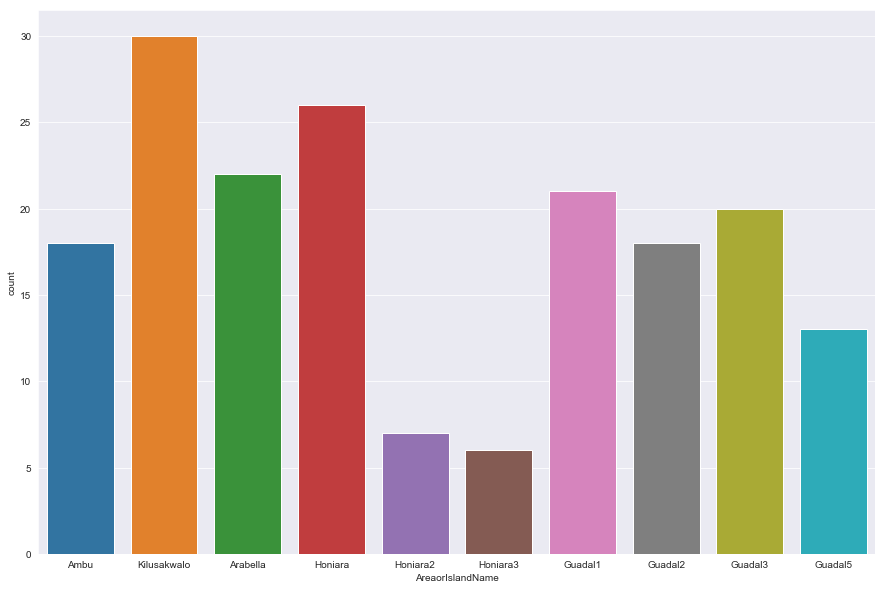

In [350]:
plt.figure(figsize=(15, 10))
sns.countplot('AreaorIslandName',
              data=solomon_df_qual)

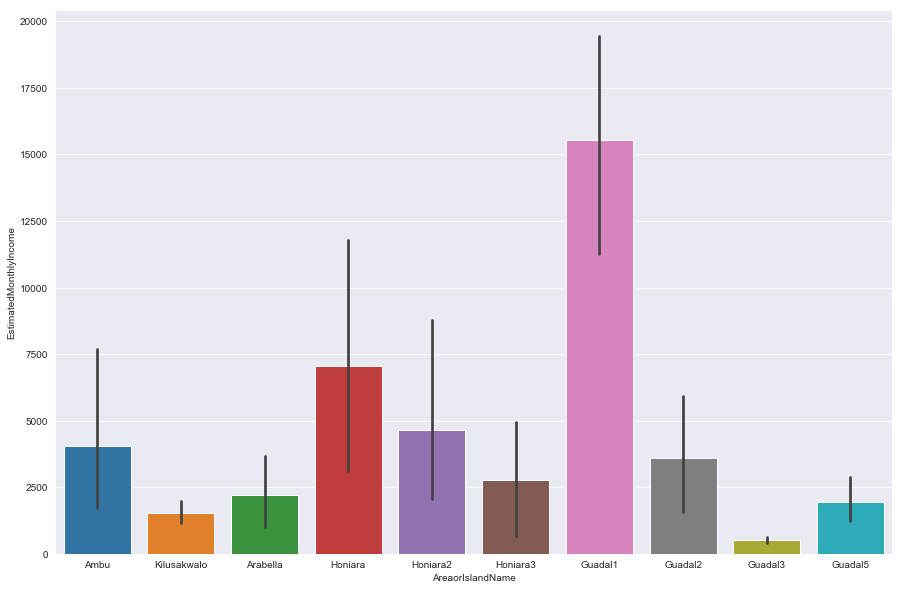

In [340]:
plt.figure(figsize=(15, 10))
sns.barplot('AreaorIslandName',
            'EstimatedMonthlyIncome',
            data=solomon_df_qual)

## Energy EDA

### Average Energy Density per Household

In [222]:
vanuatu_eda_model['energy_kWh_per_kg'].describe()

count    204.000000
mean       1.884804
std        1.158808
min        0.000000
25%        0.972500
50%        2.320000
75%        2.920000
max        3.120000
Name: energy_kWh_per_kg, dtype: float64

### Typical MSW Composition IQR

In [223]:
composition_list = ['Organics_wt_%', 'Paper_and_cardboard_wt_%', 'Plastics_wt_%']

for comp in composition_list:
    print(f'{comp} Bot IQR:', round(vanuatu_eda_model[comp].describe()['25%'] * 100, 1),'%')
    print(f'{comp} Top IQR:', round(vanuatu_eda_model[comp].describe()['75%'] * 100, 1),'%')
    print('--------------------------')

Organics_wt_% Bot IQR: 22.7 %
Organics_wt_% Top IQR: 84.6 %
--------------------------
Paper_and_cardboard_wt_% Bot IQR: 0.7 %
Paper_and_cardboard_wt_% Top IQR: 12.0 %
--------------------------
Plastics_wt_% Bot IQR: 4.7 %
Plastics_wt_% Top IQR: 23.1 %
--------------------------


### Most Frequent Items by Weight

In [ ]:
vanuatu_eda_model.groupby('')

### Number of Households per Location

In [123]:
vanuatu_eda_model.Location.value_counts()

Lelepa          60
Port Vila       50
Luganville      49
Shefa Rural     35
Ifira Island    10
Name: Location, dtype: int64

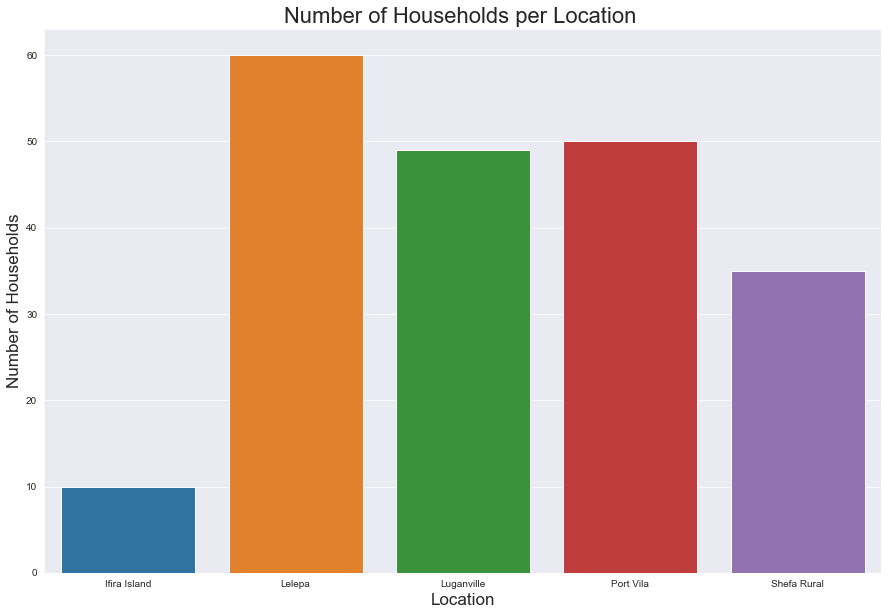

In [124]:
plt.figure(figsize=(15, 10));

location_order = ['Ifira Island',
                  'Lelepa',
                  'Luganville',
                  'Port Vila',
                  'Shefa Rural']
         
sns.countplot('Location',
              data=vanuatu_eda_model,
              order=location_order);

plt.title('Number of Households per Location ', fontsize=22);
plt.xlabel('Location', fontsize=17);
plt.ylabel('Number of Households', fontsize=17);

### MSW Composition per Location

Number of Households per Location:
 Lelepa          60
Port Vila       50
Luganville      49
Shefa Rural     35
Ifira Island    10
Name: Location, dtype: int64


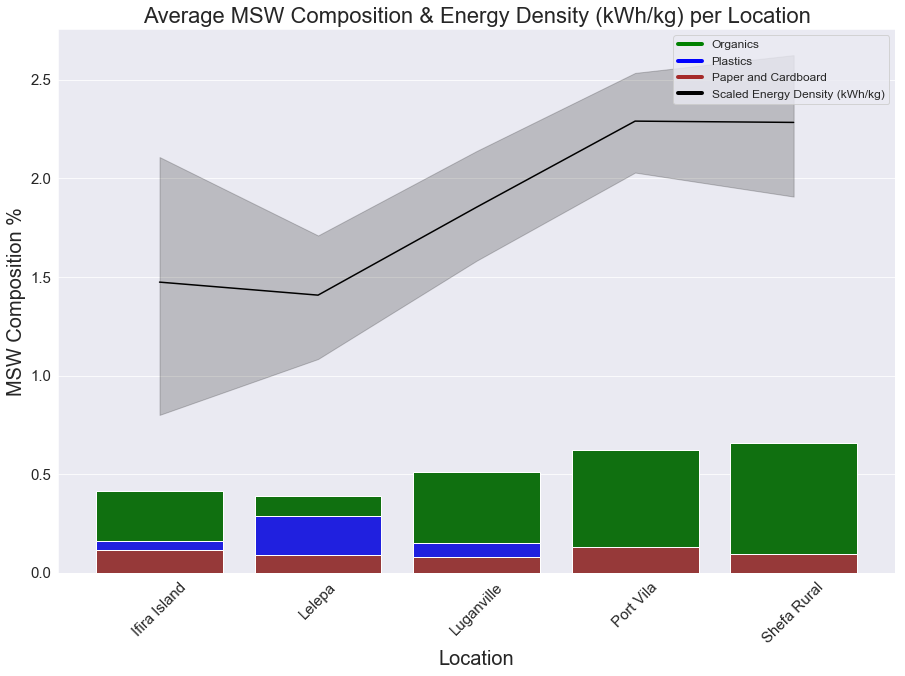

In [126]:
plt.figure(figsize=(15, 10));
print('Number of Households per Location:\n', vanuatu_eda_model['Location'].value_counts())

location_order = ['Ifira Island',
                  'Lelepa',
                  'Luganville',
                  'Port Vila',
                  'Shefa Rural']

sns.barplot('Location',
            'Organics_wt_%',
            data=vanuatu_eda_model,
            color='Green',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Plastics_wt_%',
            data=vanuatu_eda_model,
            color='Blue',
#             estimator=np.median,
            ci=0,
            order=location_order);

sns.barplot('Location',
            'Paper_and_cardboard_wt_%',
            data=vanuatu_eda_model,
            color='Brown',
#             estimator=np.median,
            ci=0,
            order=location_order);

# vanuatu_eda_model_reduced = vanuatu_eda_model.copy()
# vanuatu_eda_model_reduced['energy_kWh_per_kg'] = vanuatu_eda_model_reduced['energy_kWh_per_kg'] / 10 

sns.lineplot('Location',
             'energy_kWh_per_kg',
             data=vanuatu_eda_model,
#              estimator=np.median,
             color='Black');

plt.title('Average MSW Composition & Energy Density (kWh/kg) per Location', fontsize=22);
plt.xticks(rotation=45, fontsize=15);
plt.xlabel('Location', fontsize=20);
plt.yticks(fontsize=15);
plt.ylabel('MSW Composition %', fontsize=20);
# plt.ylim(0, 1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='Green', lw=4),
                Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Brown', lw=4),
                Line2D([0], [0], color='Black', lw=4)]

plt.legend(custom_lines, ['Organics',
                          'Plastics',
                          'Paper and Cardboard',
                          'Energy Density (kWh/kg)'],
           fontsize=12);
#            title='Waste Type',
#            title_fontsize=18);